In [8]:
df <- read.csv("test_data/gene_batch_search.csv")
df

X,Variant.ID,Gene,Consequence,Annotation,Flags,Allele.Count,Allele.Number,Allele.Frequency,Number.of.Homozygotes,⋯,Amish,Latino,Ashkenazi.Jewish,East.Asian,European..Finnish.,European..non.Finnish.,Other,South.Asian,Middle.Eastern,Number.of.Hemizygotes
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4-987010-C-G,IDUA,c.-75C>G,5_prime_UTR_variant,[],1,149172,6.703671e-06,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,1.486945e-05,0.0000000000,0,0.000000000,NA
1,4-987013-G-A,IDUA,c.-72G>A,5_prime_UTR_variant,[],3,151256,1.983392e-05,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,9.606148e-05,2.949070e-05,0.0000000000,0,0.000000000,NA
2,4-987014-C-T,IDUA,c.-71C>T,5_prime_UTR_variant,[],37,152092,2.432738e-04,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,1.884304e-04,4.411505e-04,0.0004780115,0,0.000000000,NA
3,4-987021-T-C,IDUA,c.-64T>C,5_prime_UTR_variant,[],2,146758,1.362788e-05,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,2.992847e-05,0.0000000000,0,0.000000000,NA
4,4-987023-C-G,IDUA,c.-62C>G,5_prime_UTR_variant,[],1,152126,6.573498e-06,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000000,NA
5,4-987023-C-T,IDUA,c.-62C>T,5_prime_UTR_variant,[],1,152126,6.573498e-06,0,⋯,0,6.543646e-05,0.000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000000,NA
6,4-987026-C-T,IDUA,c.-59C>T,5_prime_UTR_variant,[],2,152122,1.314734e-05,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000000,NA
7,4-987027-C-G,IDUA,c.-58C>G,5_prime_UTR_variant,[],1,152154,6.572289e-06,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,1.470415e-05,0.0000000000,0,0.000000000,NA
8,4-987027-C-A,IDUA,c.-58C>A,5_prime_UTR_variant,[],1,152154,6.572289e-06,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000000,NA


In [14]:
get_reoordered_df <- function(df){
    col_idx_homo <- grep("Number.of.Homozygotes", names(df))
    col_idx_hemi <- grep("Number.of.Hemizygotes", names(df))
    col_len <- length(names(df))
    
    return(df[, c(1:col_idx_homo,col_idx_hemi,(col_idx_homo+1):col_len)[-col_idx_hemi-1]])
}



get_pop_dfs <- function(df=NULL, freq_threshold=0.001){
    
    col_idx_alternative <- grep("Alternative", names(df))
    population_indexes <- c((col_idx_alternative+1):length(names(df)))
    
    populations_dfs <- c()
    i <- 1
    for (pop_idx in population_indexes){
        df_temp <- df[, c(1:col_idx_alternative,pop_idx)]
        populations_dfs[[i]] <- df_temp[df_temp[,ncol(df_temp)] > freq_threshold, ]
        i <- i + 1
    }
    
    return(populations_dfs)
}


get_pop_var_lists <- function(populations_dfs=NULL){
    
    pop_var_lists <- list()
    pop_names <- c()
    i <- 1
    for (pop in populations_dfs){
        
        pop_names[i] <- names(pop)[length(names(pop))]
        pop_var_lists[[i]] <- c(pop[,"Variant.ID"])
        i <- i+1
    }
    
    names(pop_var_lists) <- pop_names
    return(pop_var_lists)
}


keep_singles <- function(v){
  v[!(v %in% v[duplicated(v)])] 
}


get_number_of_vars <- function(pop_var_lists=NULL){
    all_vars <- unname(unlist(pop_var_lists, recursive = FALSE))
    unique <- keep_singles(all_vars)
    return(length(unique))
}

In [15]:
df <- get_reoordered_df(df)
pop_dfs <- get_pop_dfs(df)
pops_vars <- get_pop_var_lists(pop_dfs)
num_unique_vars <- get_number_of_vars(pops_vars)

In [4]:
names(pops_vars)

[1] "African"                "Amish"                  "Latino"                
 [4] "Ashkenazi.Jewish"       "East.Asian"             "European..Finnish."    
 [7] "European..non.Finnish." "Other"                  "South.Asian"           
[10] "Middle.Eastern"

In [5]:
current <- unname(pops_vars[5])[[1]]
all_others <- unlist(unname(pops_vars[c(1:length(pops_vars))[-5]]))

In [6]:
num_total <- length(current)
num_common <- length(intersect(current,all_others))
num_private <- num_total-num_common 

In [7]:
print(num_common)
print(num_private)

[1] 52
[1] 26


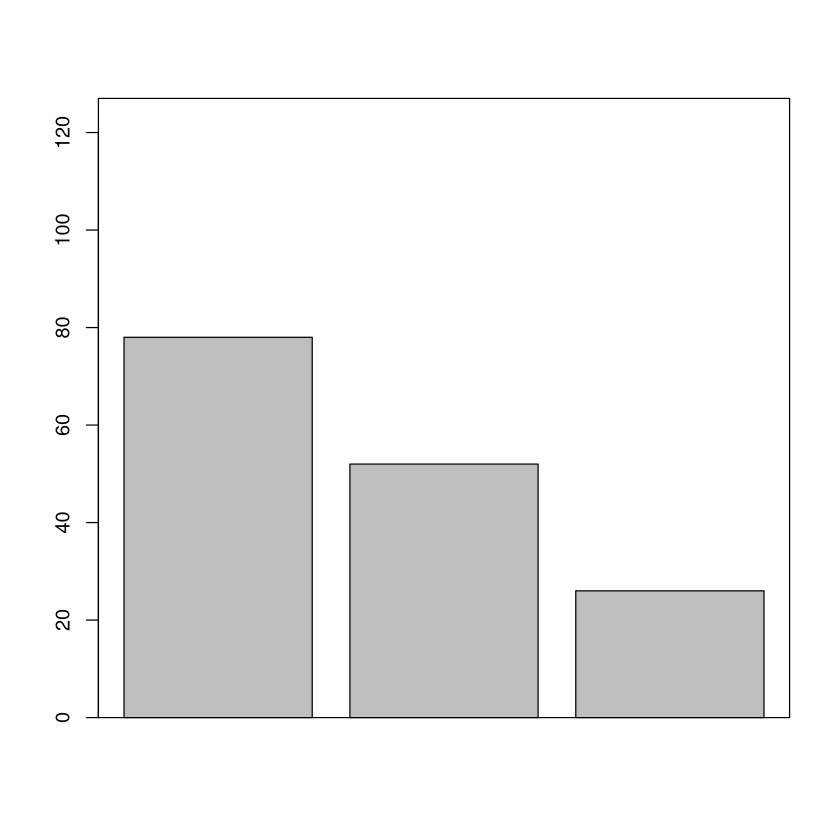

In [8]:
b<-barplot(c(num_total, num_common, num_private), ylim=c(0,num_unique_vars), width = 1)
box()

In [8]:
library(ggplot2)
library(ggthemes)
value <- c(num_total, num_common, num_private)
legend <- c("Total", "Common", "Private")
facet <- c("-","-","-")
bp <- data.frame(value,legend,facet)
bp$legend = factor(bp$legend, levels = c("Total","Common","Private"))
bp

value,legend,facet
<int>,<fct>,<chr>
78,Total,-
52,Common,-
26,Private,-


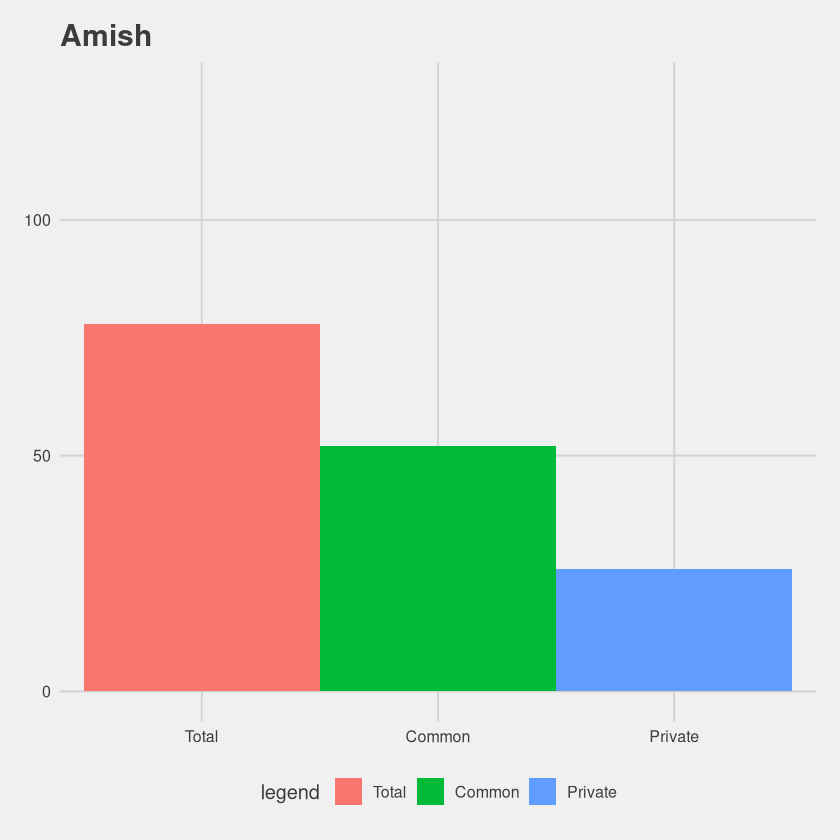

In [21]:
ggplot(data=bp, aes(x=legend,y=value,fill=legend)) +
    geom_bar(stat="identity", width=1)+#, color="black", fill="yellow") +
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()
    
    #theme(panel.grid.major = element_line(colour = "black"))
    #theme_grey()

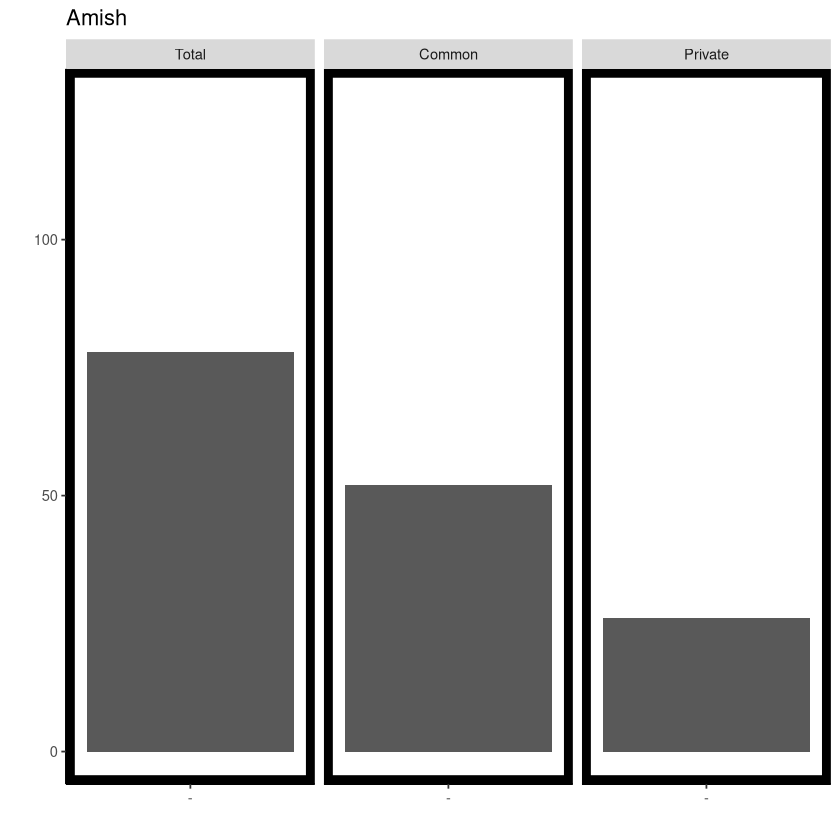

In [229]:
ggplot(data=bp, aes(x=facet,y=value)) +
    geom_bar(stat="identity", width=1)+#, color="black", fill="yellow") +
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    #theme_fivethirtyeight() + geom_rug() +
    theme(panel.background = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        panel.border = element_rect(colour = "black", fill=NA, size=5)) +
    facet_wrap( ~ legend )
    #theme(panel.grid.major = element_line(colour = "black"))
    #theme_grey()

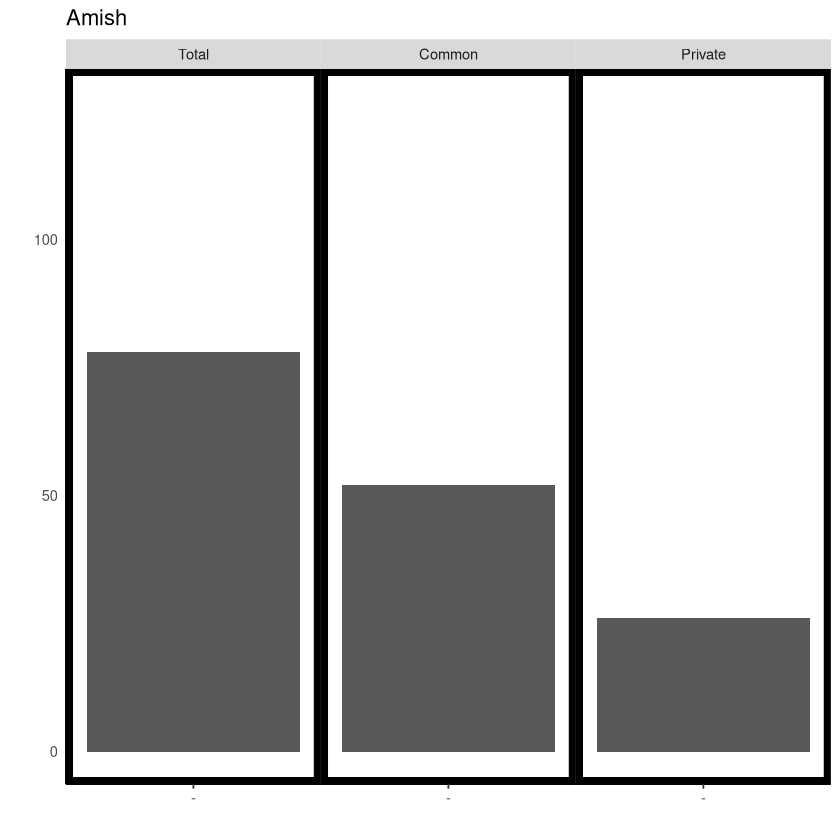

In [262]:
ggplot(data=bp, aes(x=facet,y=value)) +
    geom_bar(stat="identity", width=1, position = position_dodge(width=0))+#, color="black", fill="yellow") +
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme(panel.spacing = unit(0, "mm"),
        panel.background = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
          axis.text.y.right = element_blank(),
        axis.ticks.y = element_blank(),  
        axis.line = element_line(colour = "black"),
          strip.background = element_rect(size = 0.5),
        panel.border = element_rect(colour = "black", fill=NA, size=4)) +
    facet_wrap( ~ legend )

# Tentativas de implementar gradiente nas barras

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

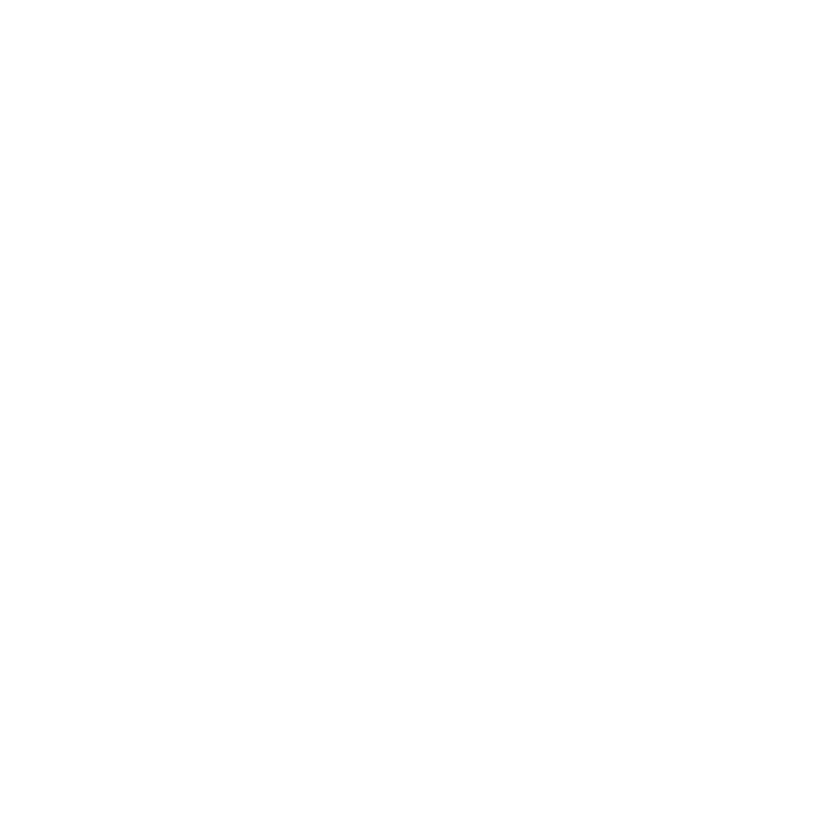

In [20]:
ggplot(data=bp, aes(x=legend,y=value,fill=legend)) +
    geom_bar(stat="identity", width=1, color="black")+#, color="black", fill="yellow") +
    scale_fill_gradient2(low="white",high="darkred") +
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

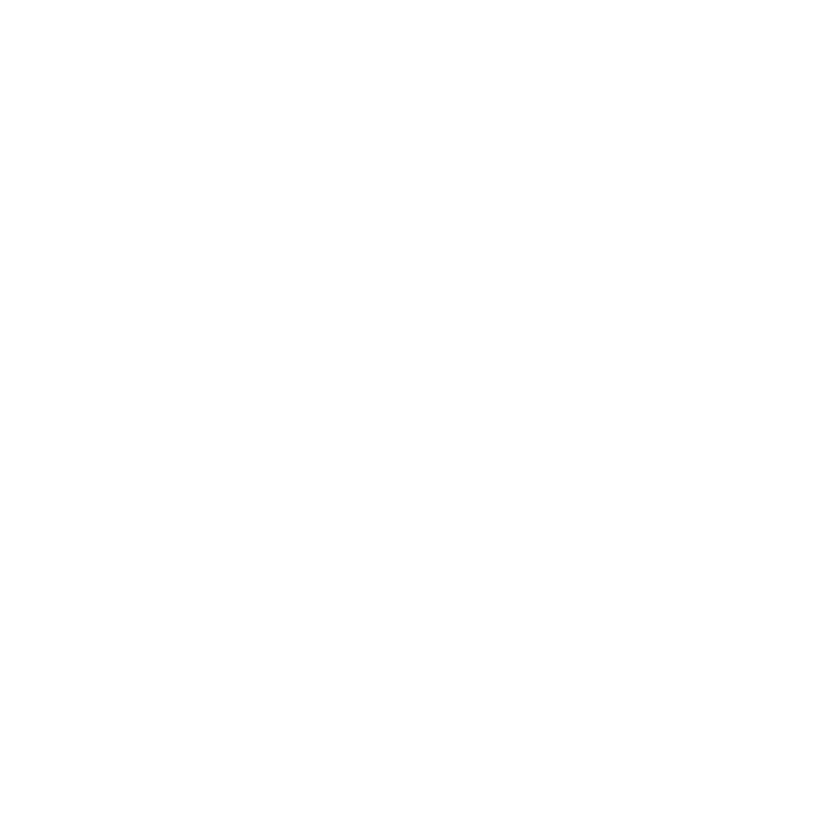

In [19]:
ggplot(data=bp, aes(x=legend,y=value,fill=as.factor(legend))) +
    geom_bar(stat="identity", width=1)+#, color="black", fill="yellow") +
    scale_fill_gradient(low = "green", high = "red")+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

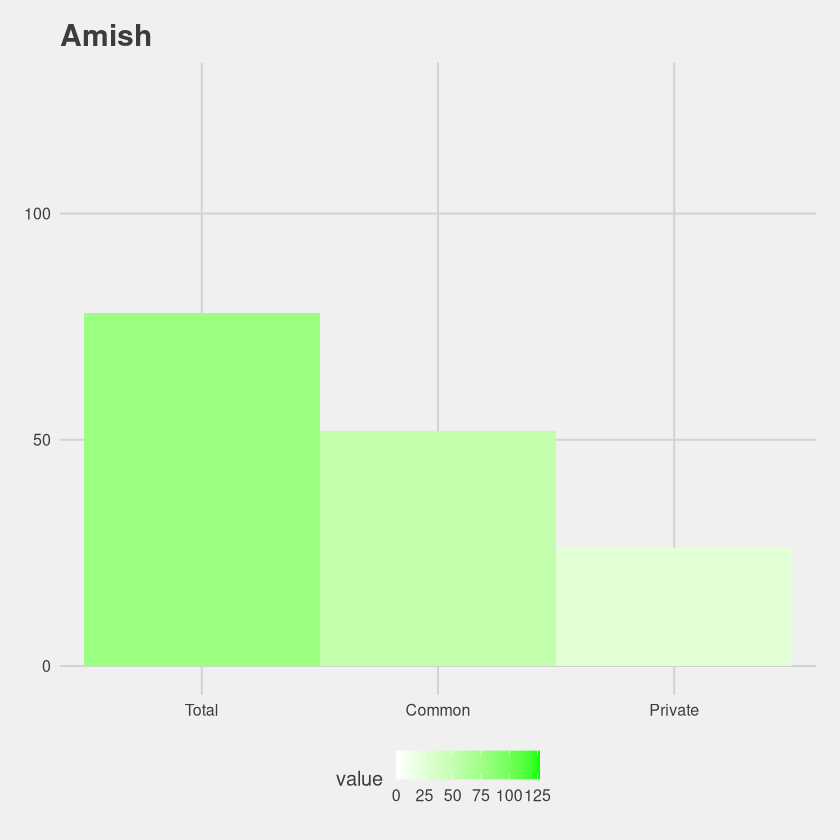

In [34]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value))+
    scale_fill_gradient2(limits=c(0,num_unique_vars), low='snow', high='green')+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

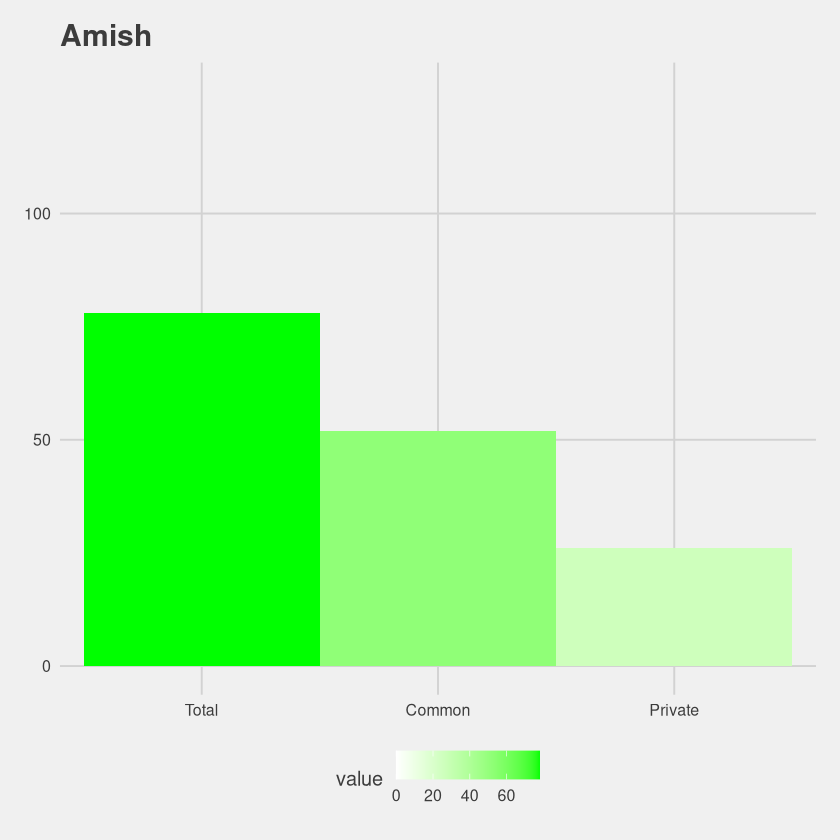

In [42]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value))+
    scale_fill_gradient2(limits=c(0,num_total), low='snow', high='green')+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

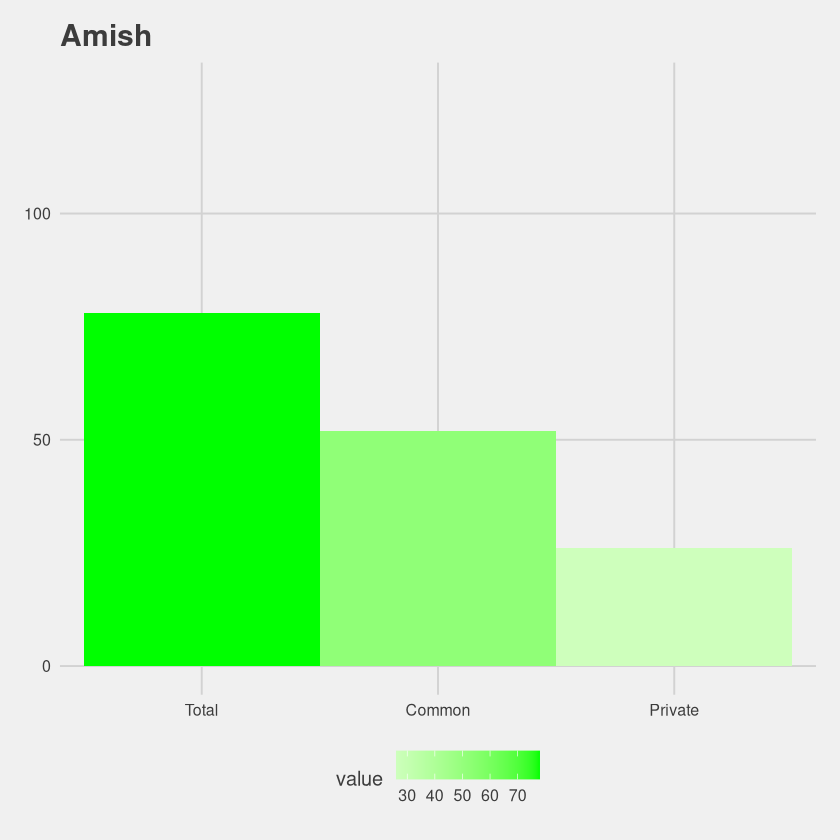

In [46]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value))+
    scale_fill_gradient2(high='green')+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

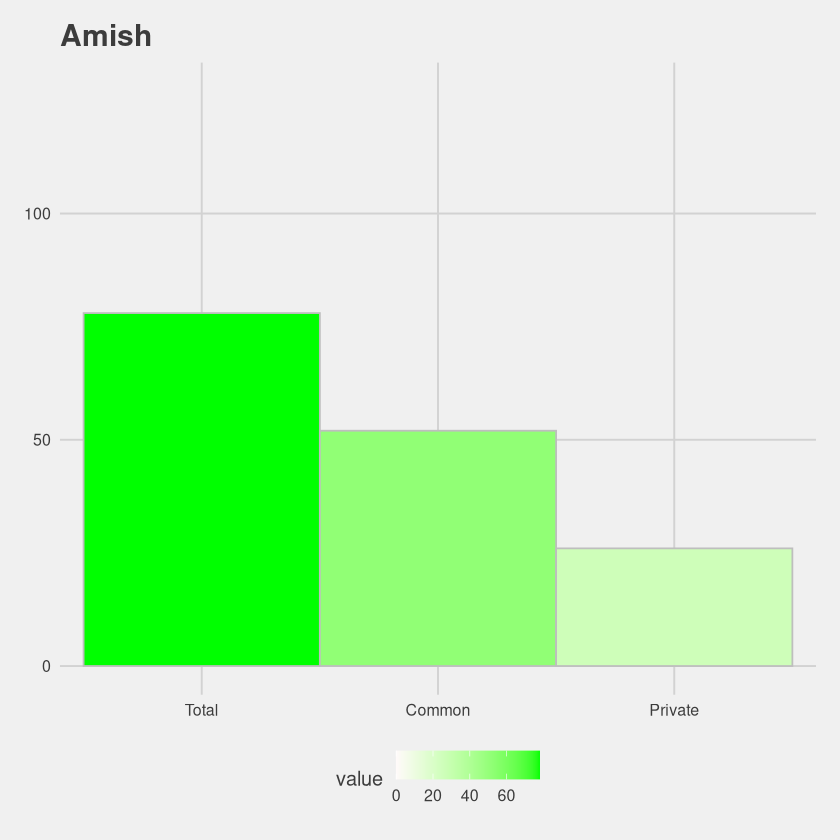

In [55]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value), colour="grey")+
    scale_fill_gradient(high='green', low='snow', limits=c(0,num_total))+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

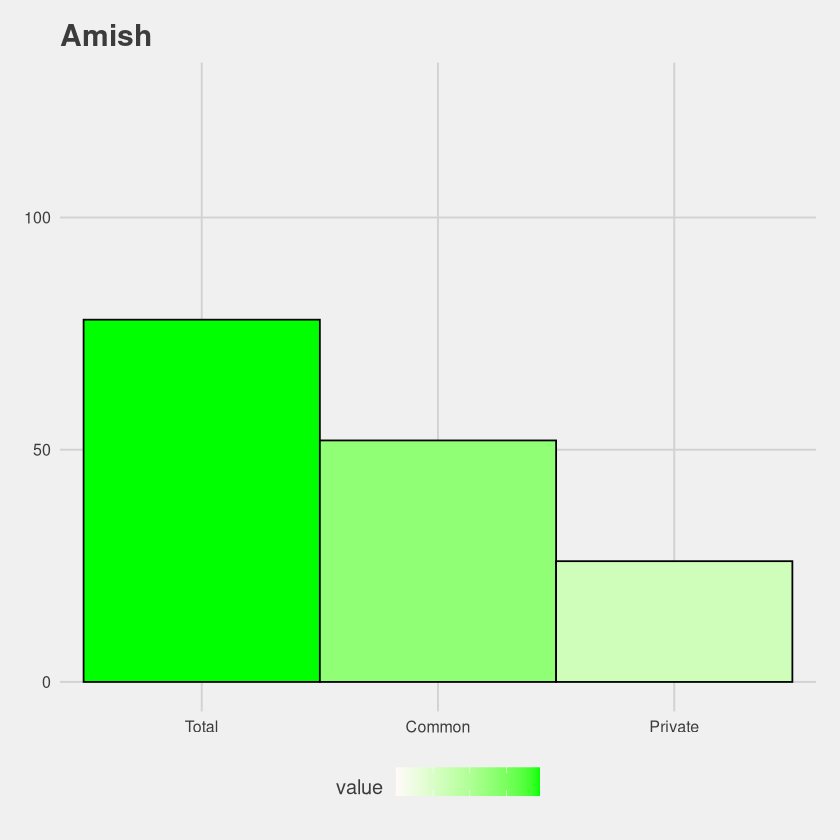

In [58]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value), colour="black")+
    scale_fill_gradient(high='green', low='snow', limits=c(0,num_total), labels=NULL)+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

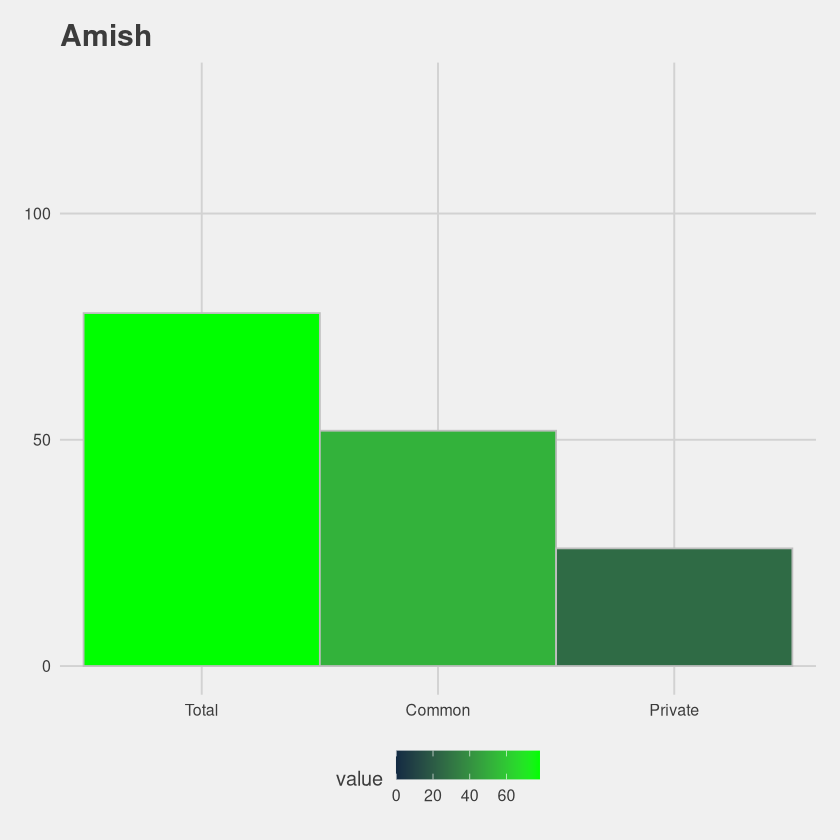

In [61]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value), colour="grey")+
    scale_fill_gradient(high='green', limits=c(0,num_total))+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

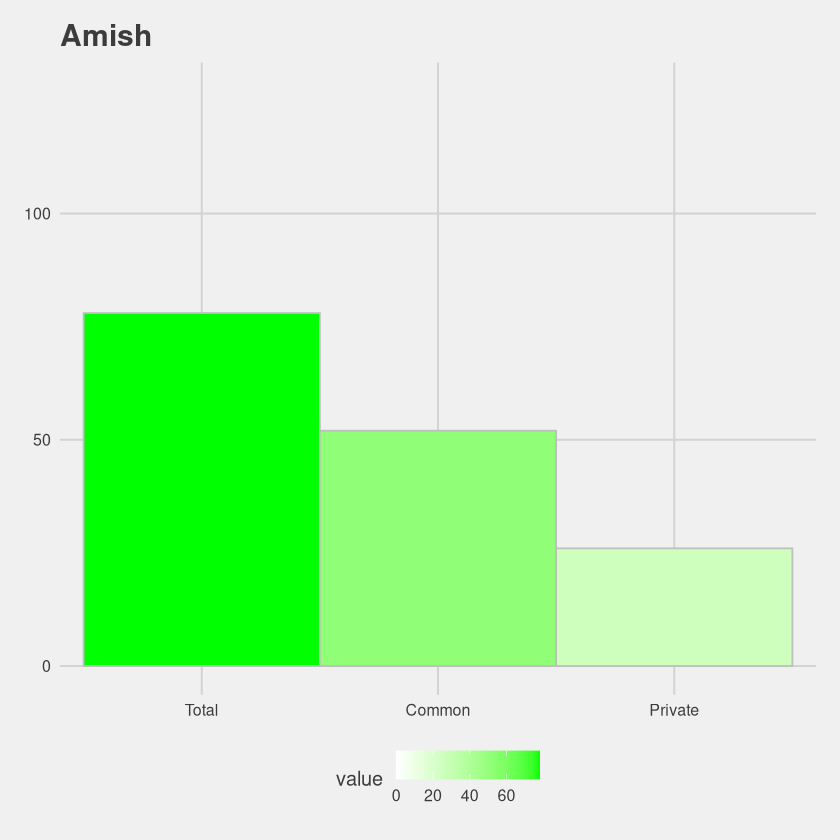

In [64]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value), colour="grey")+
    scale_fill_gradient2(high='green', limits=c(0,num_total))+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

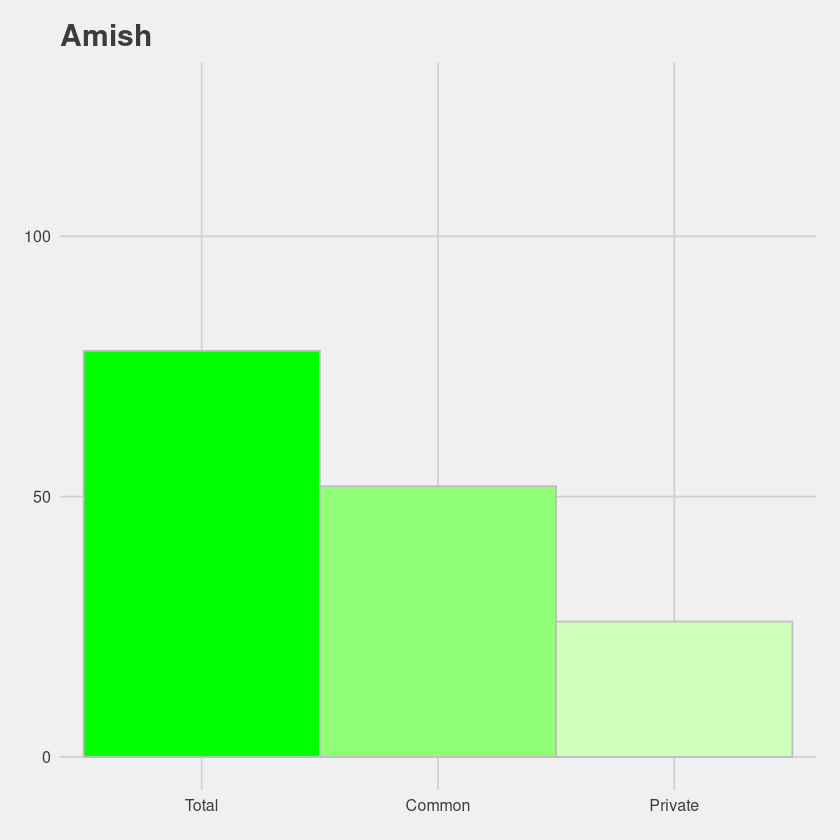

In [83]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value), colour="grey",show.legend = FALSE)+
    scale_fill_gradient2(high='green', limits=c(0,num_total))+
    xlab("") +
    ylab("") +
    ylim(0,num_unique_vars) +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

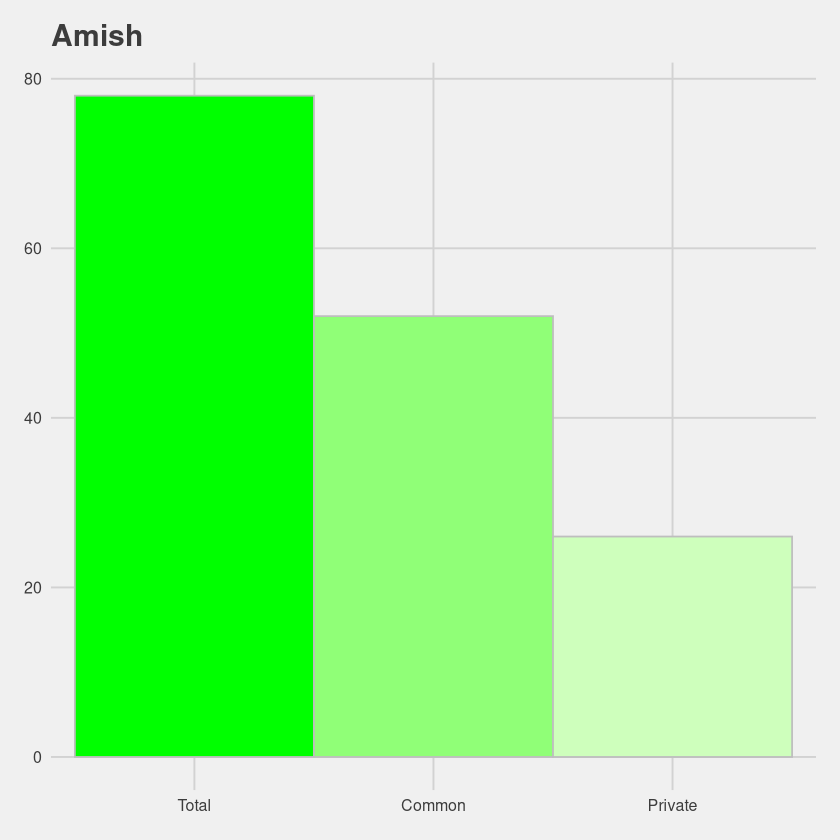

In [84]:
ggplot(data=bp, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value), colour="grey",show.legend = FALSE)+
    scale_fill_gradient2(high='green', limits=c(0,num_total))+
    xlab("") +
    ylab("") +
    ggtitle("Amish")+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight()

# Trying to plot for every population

In [104]:
pop_colors = c("darkgoldenrod2", "lightgoldenrod3", "darkgreen", "orangered3", "magenta4", 
               "royalblue4", "midnightblue", "lavenderblush4", "darkred", "tan4")
pop_names = c('African', 'Amish', 'Latino', 'Ashkenazi.Jewish',
              'East.Asian', 'European..Finnish.', 'European..non.Finnish.',
              'Other', 'South.Asian', 'Middle.Eastern')

names(pop_colors) = pop_names
pop_colors

African                  Amish                 Latino 
      "darkgoldenrod2"      "lightgoldenrod3"            "darkgreen" 
      Ashkenazi.Jewish             East.Asian     European..Finnish. 
          "orangered3"             "magenta4"           "royalblue4" 
European..non.Finnish.                  Other            South.Asian 
        "midnightblue"       "lavenderblush4"              "darkred" 
        Middle.Eastern 
                "tan4"

In [105]:
a<-"African"
pop_colors[a][[1]]

[1] "darkgoldenrod2"

In [135]:
barplot_population_variants <- function(num_total, num_common, num_private, pop_name, pop_color, num_all_among_pops=0){
    
    if(num_all_among_pops == 0){
        num_all_among_pops = num_total
    }
    
    value <- c(num_total, num_common, num_private)
    legend <- c("Total", "Common", "Private")
    barplot_df <- data.frame(value,legend)
    barplot_df$legend = factor(bp$legend, levels = c("Total","Common","Private"))
    
    
    return(ggplot(data=barplot_df, aes(x=legend,y=value)) +
    geom_bar(stat="identity", width=1, aes(fill=value), colour="grey",show.legend = FALSE)+
    scale_fill_gradient2(high=pop_color, limits=c(-num_all_among_pops,num_all_among_pops))+
    #scale_fill_gradient(high=pop_color, limits=c(0,num_total))+
    xlab("") +
    ylab("") +
    ylim(0,num_all_among_pops) +
    ggtitle(pop_name)+
    scale_color_fivethirtyeight("cyl") +
    theme_fivethirtyeight())
}


plot_all <- function(pops_variants, pop_colors){
    
    i <- 1
    for(pop in pops_variants){
        current_variants <- pop
        current_pop_name <- names(pops_variants)[i]
        all_other_variants <- unlist(unname(pops_variants[c(1:length(pops_variants))[-i]]))
        
        num_total <- length(current_variants)
        num_common <- length(intersect(current_variants, all_other_variants))
        num_private <- num_total-num_common 
        
        pop_plot <- barplot_population_variants(num_total, num_common, num_private, current_pop_name, 
                                                pop_colors[current_pop_name][[1]])
        print(pop_plot)
        i <- i+1
    }
    
}

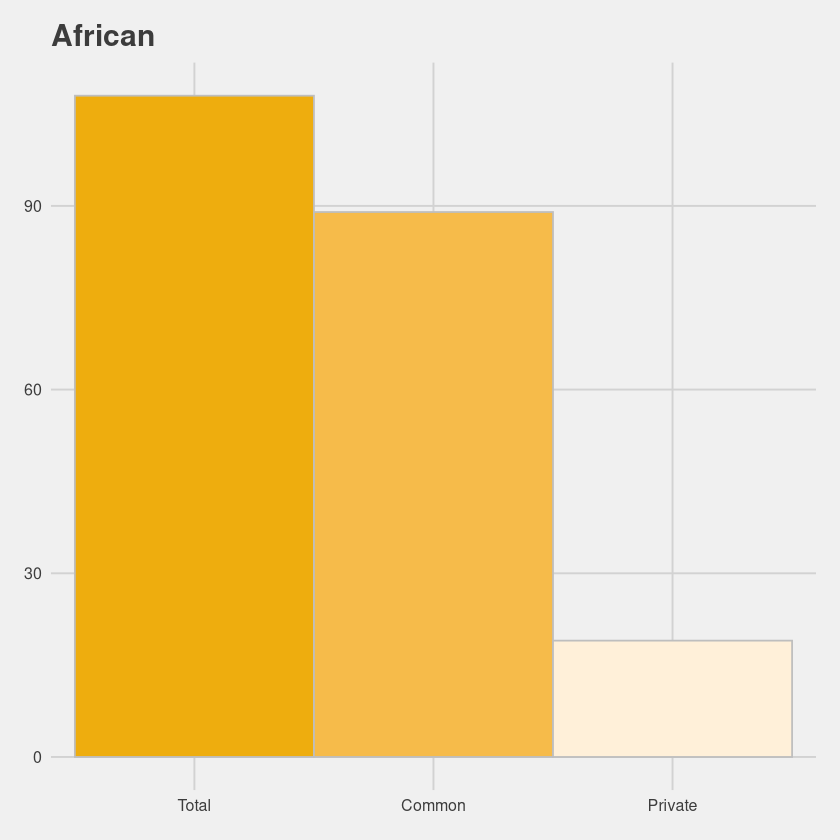

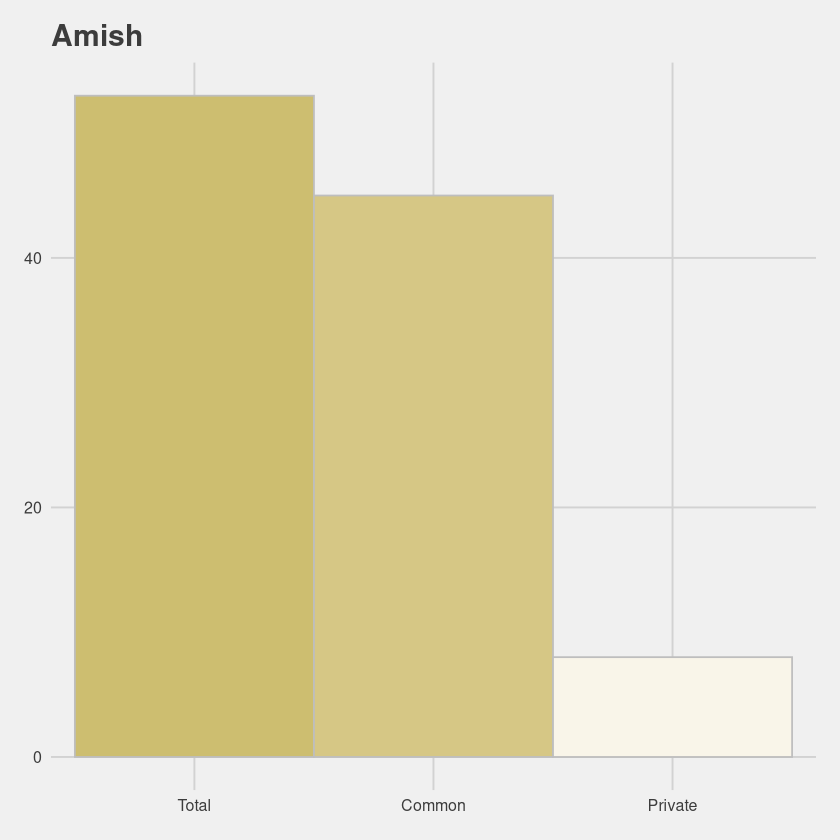

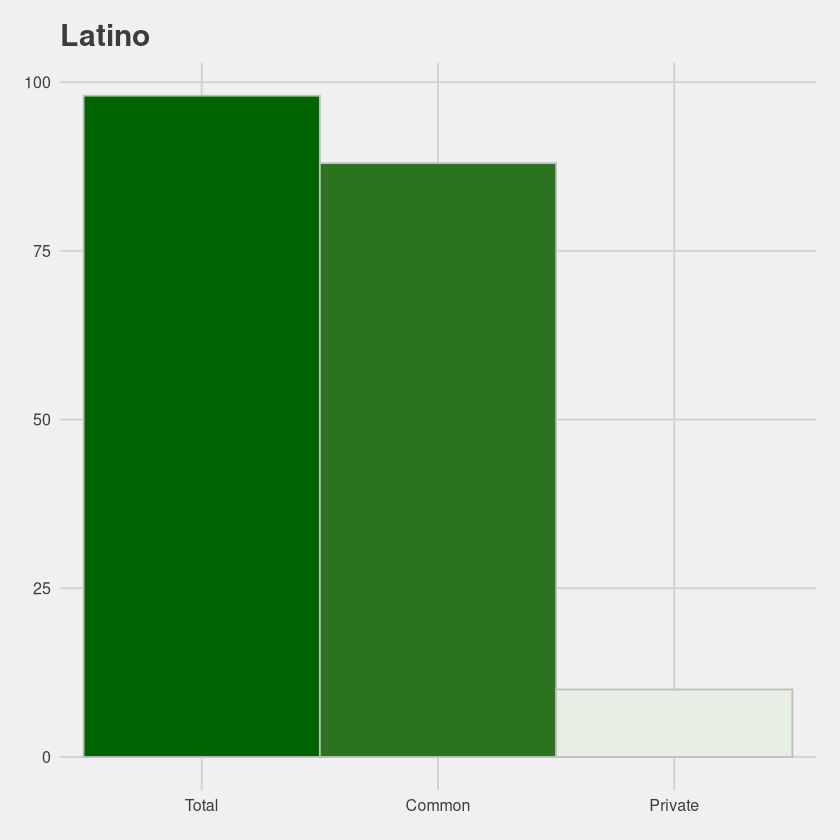

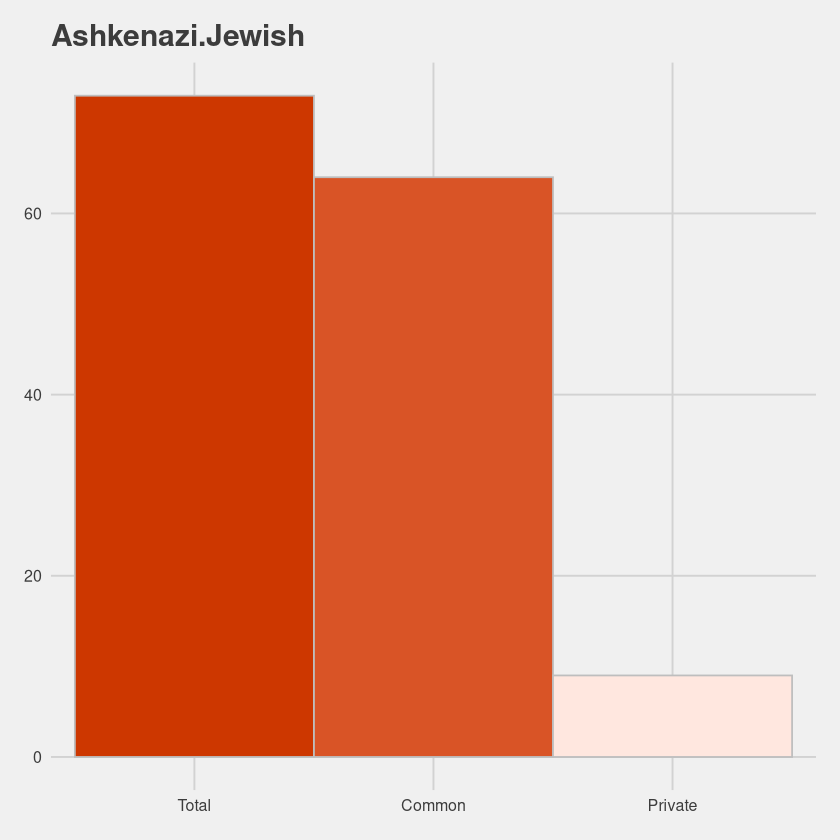

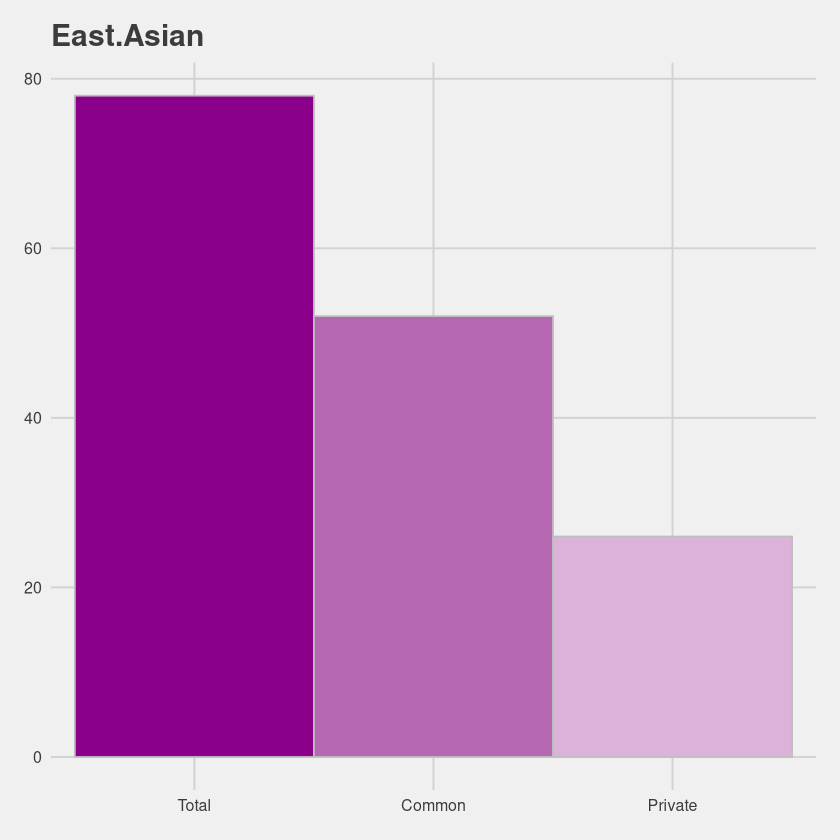

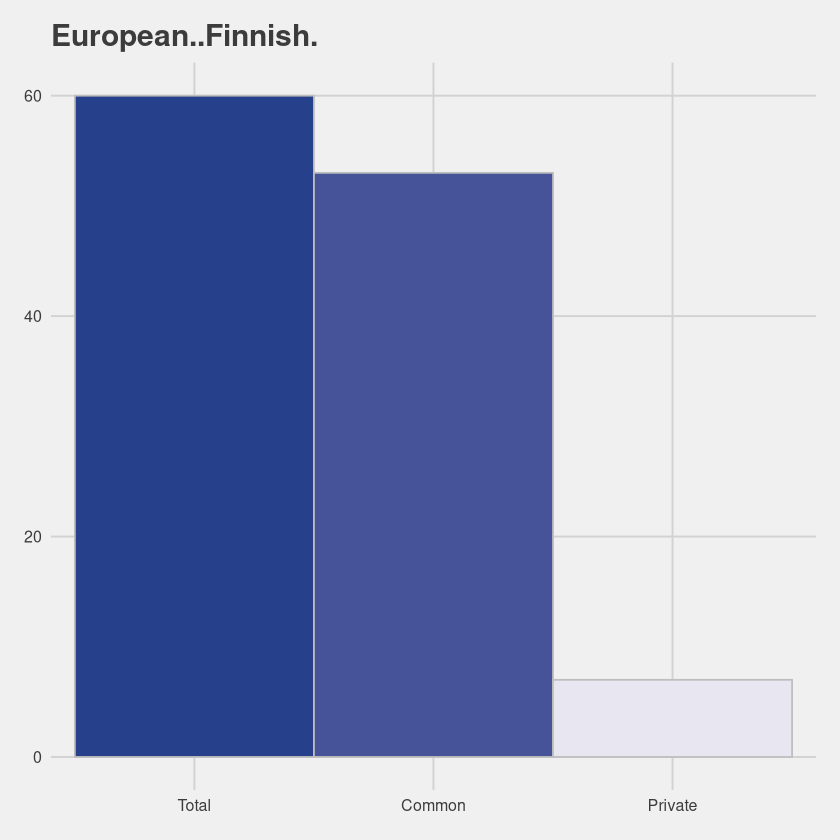

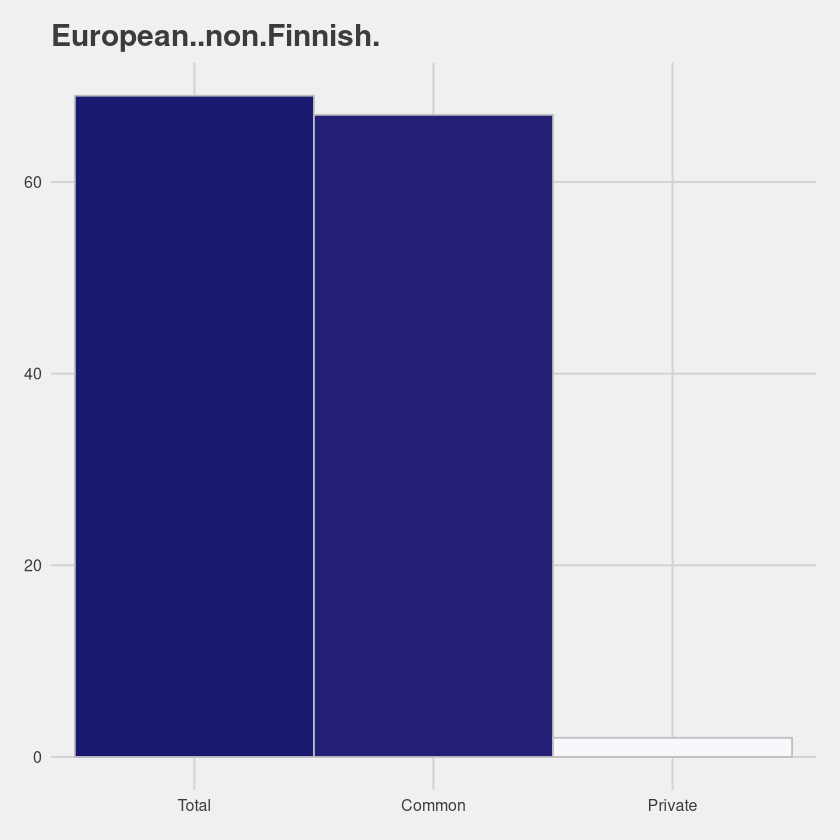

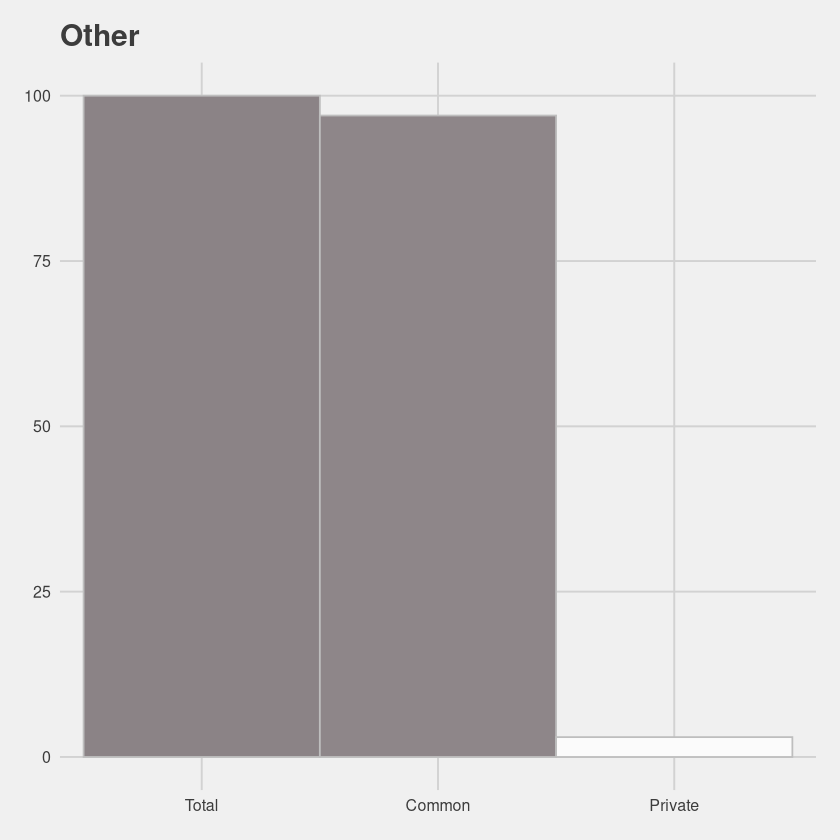

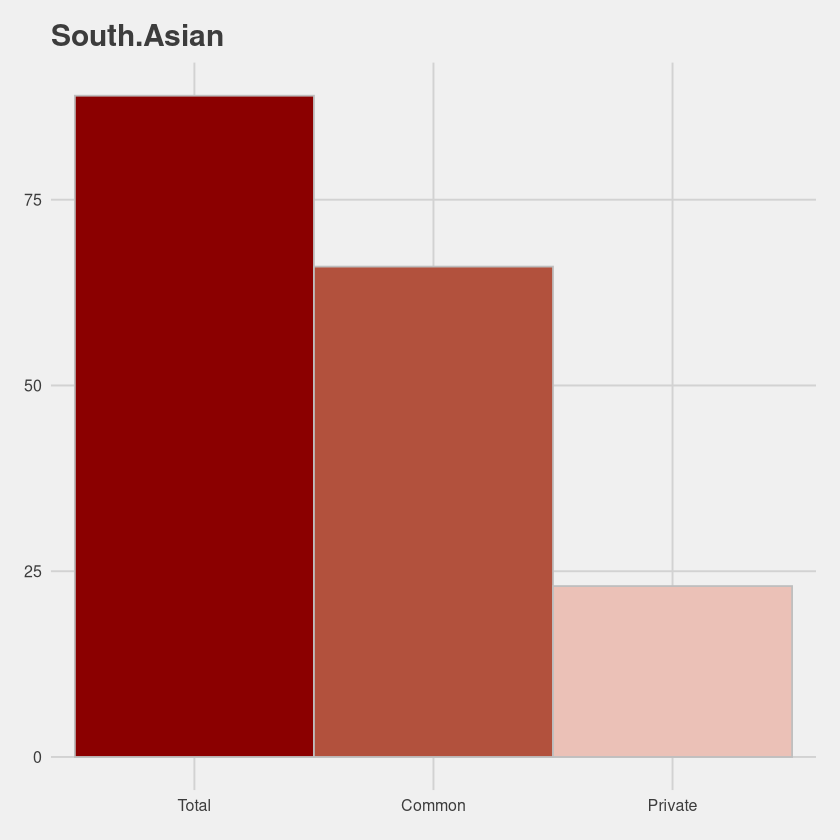

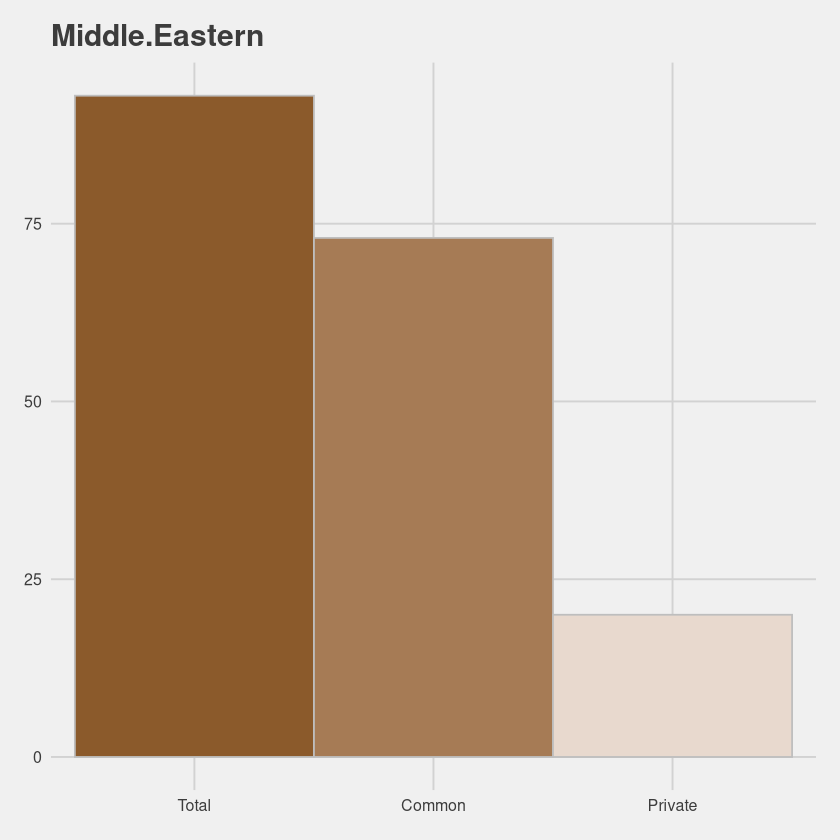

In [136]:
plot_all(pops_vars, pop_colors)

In [137]:
plot_all_upper_bound_indicated <- function(pops_variants, pop_colors){
    
    num_all_among_pops <- get_number_of_vars(pops_vars)
    
    i <- 1
    for(pop in pops_variants){
        current_variants <- pop
        current_pop_name <- names(pops_variants)[i]
        all_other_variants <- unlist(unname(pops_variants[c(1:length(pops_variants))[-i]]))
        
        num_total <- length(current_variants)
        num_common <- length(intersect(current_variants, all_other_variants))
        num_private <- num_total-num_common 
        
        pop_plot <- barplot_population_variants(num_total, num_common, num_private, current_pop_name, 
                                                pop_colors[current_pop_name][[1]], num_all_among_pops)
        print(pop_plot)
        i <- i+1
    }
    
}

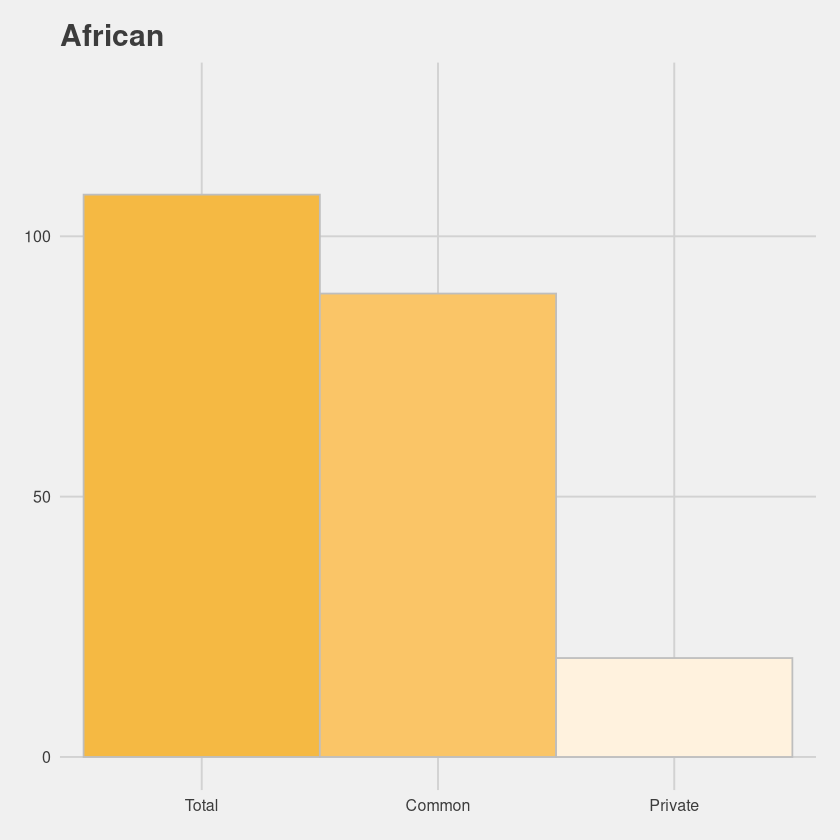

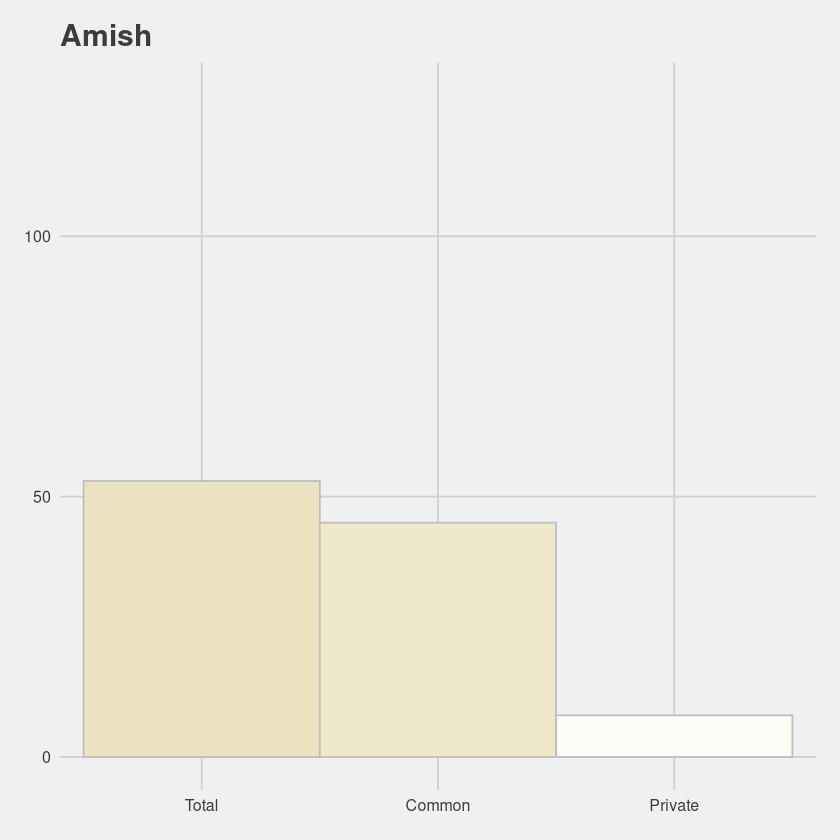

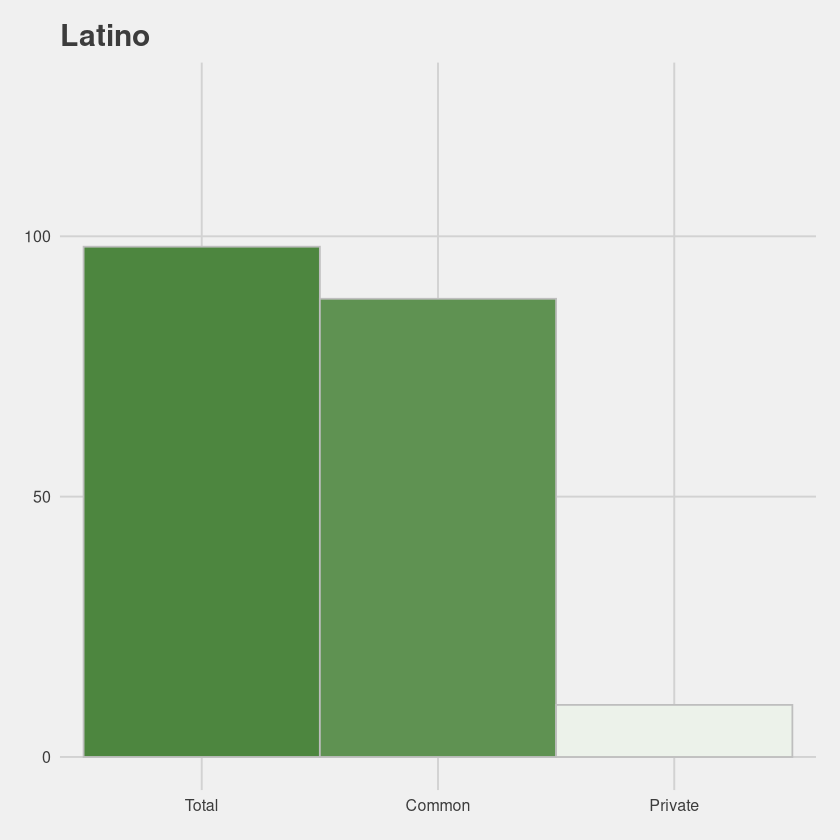

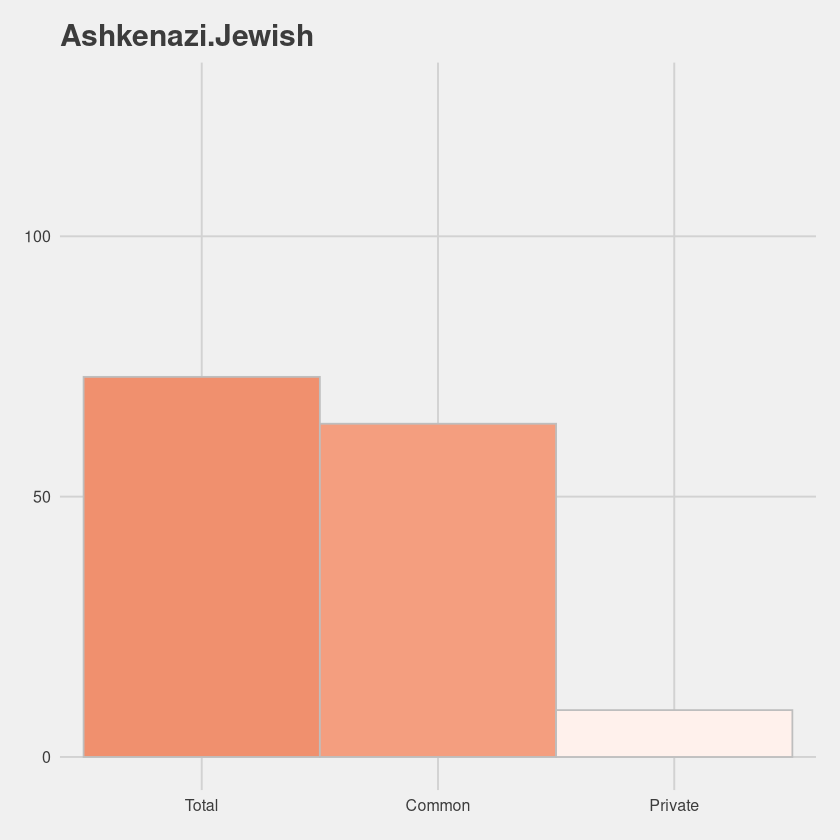

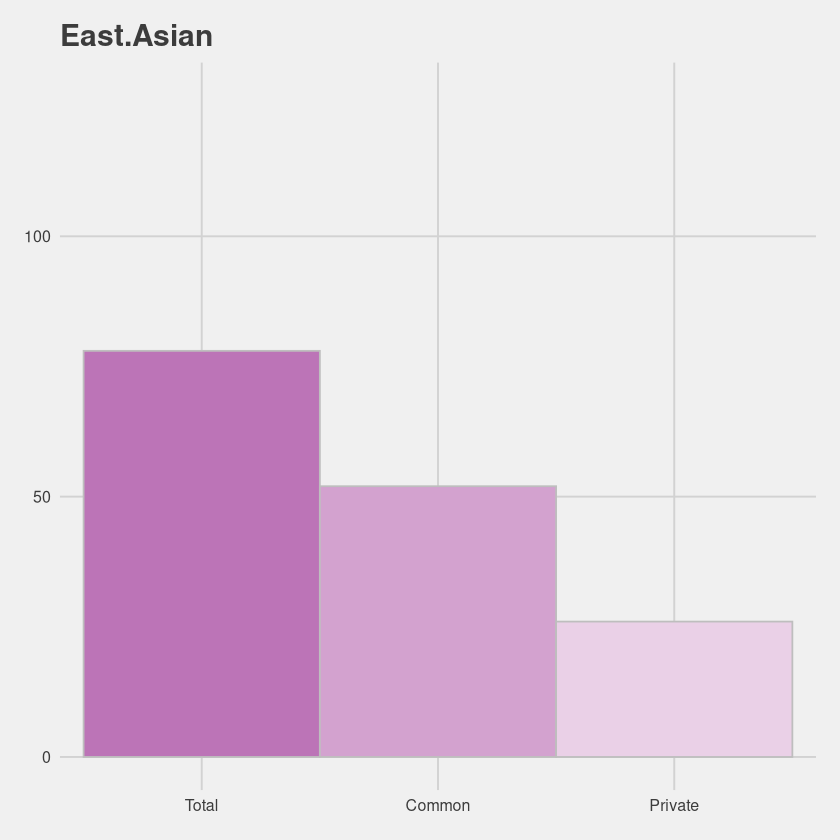

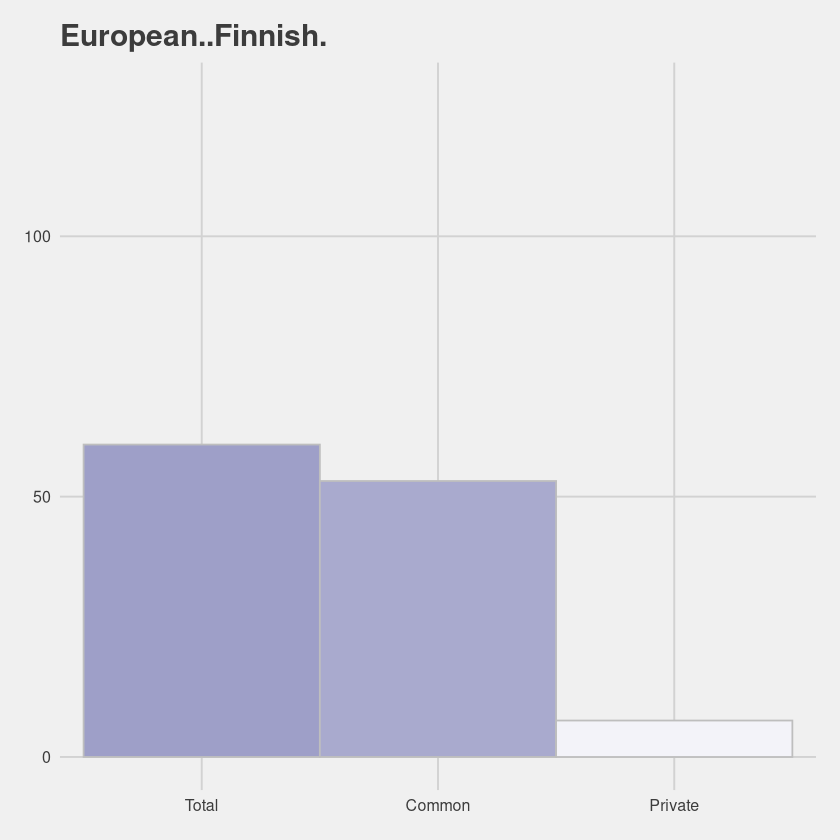

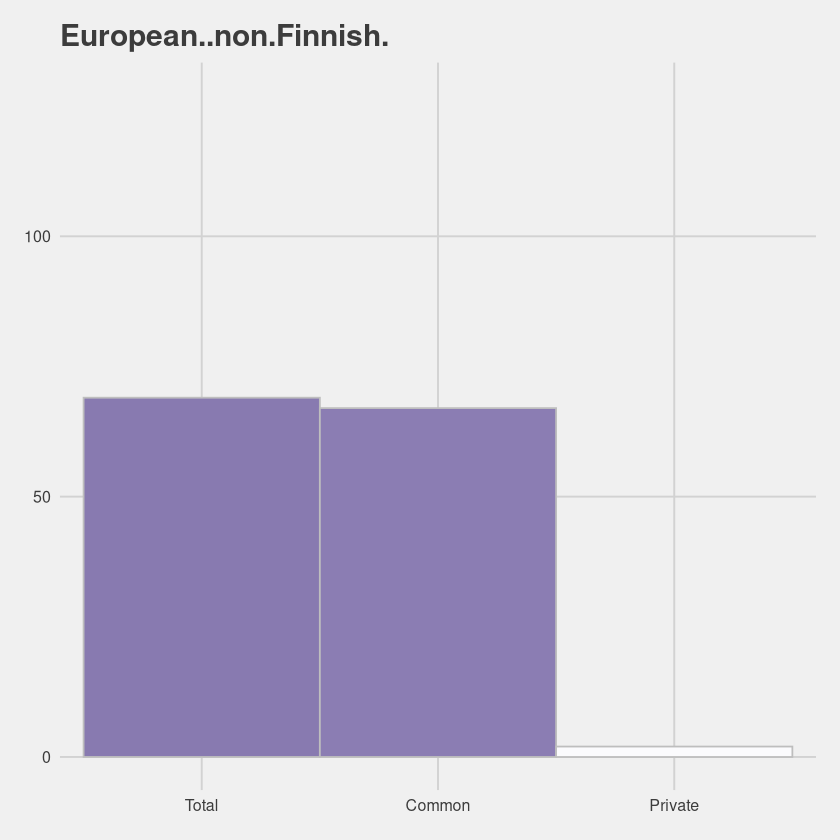

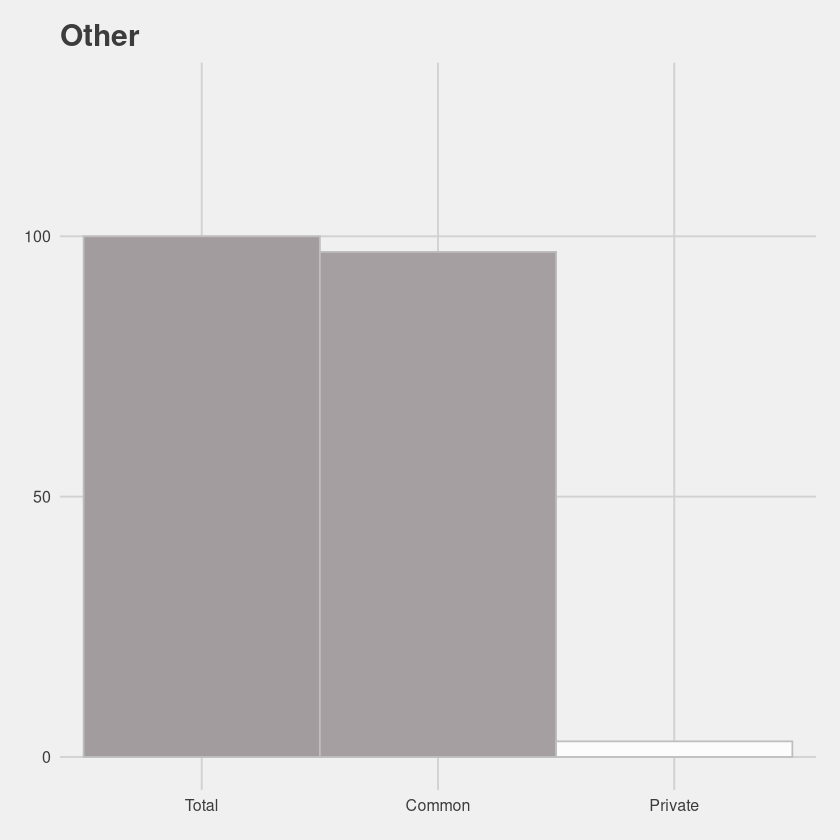

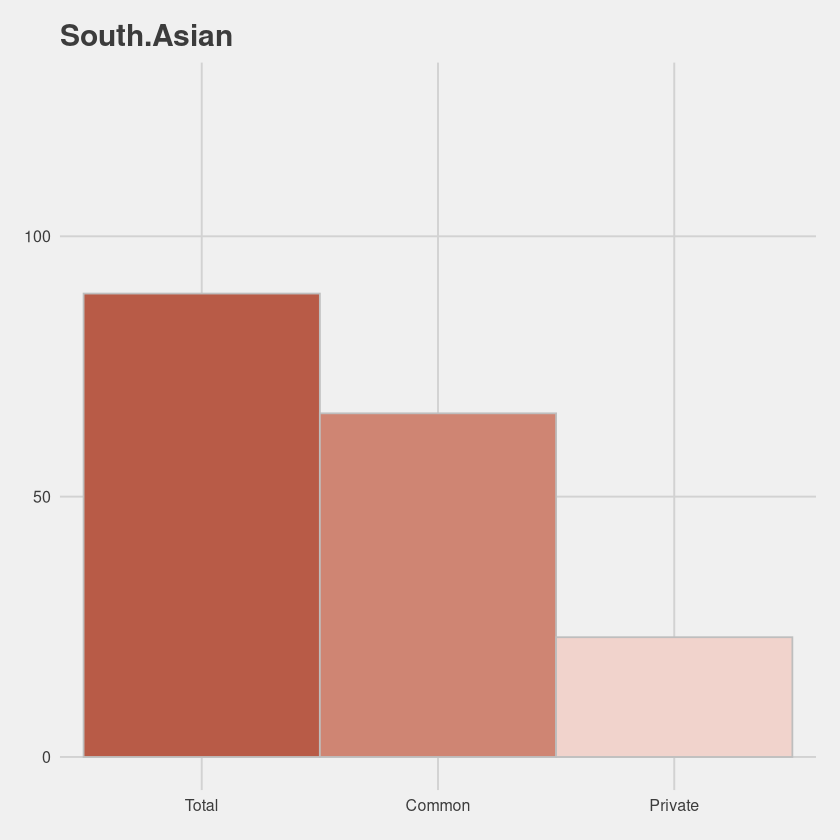

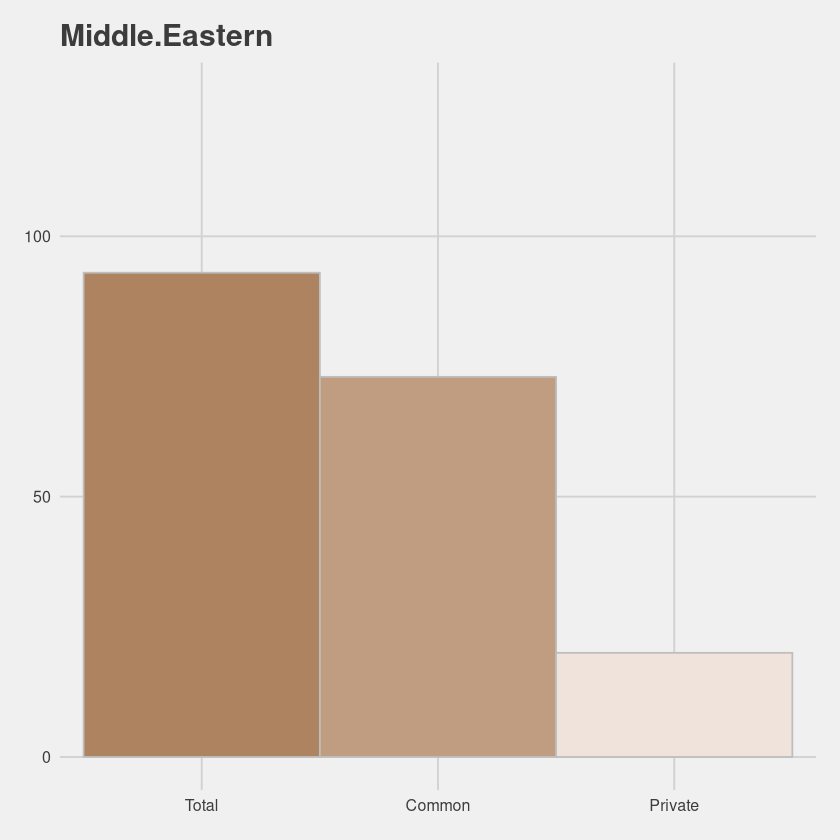

In [138]:
plot_all_upper_bound_indicated(pops_vars, pop_colors)

# Mais uma tentativa de fazer o barplot compartimentado

In [11]:
value <- c(num_total, num_common, num_private)
legend <- c("Total", "Common", "Private")
fill_to_high <- c(num_unique_vars-num_total, num_unique_vars-num_common, num_unique_vars-num_private)
bp <- data.frame(value,legend,fill_to_high)
bp$legend = factor(bp$legend, levels = c("Total","Common","Private"))
bp

value,legend,fill_to_high
<int>,<fct>,<int>
78,Total,49
52,Common,75
26,Private,101


Warning message:
“Ignoring unknown parameters: aes”
ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (12): x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_hand

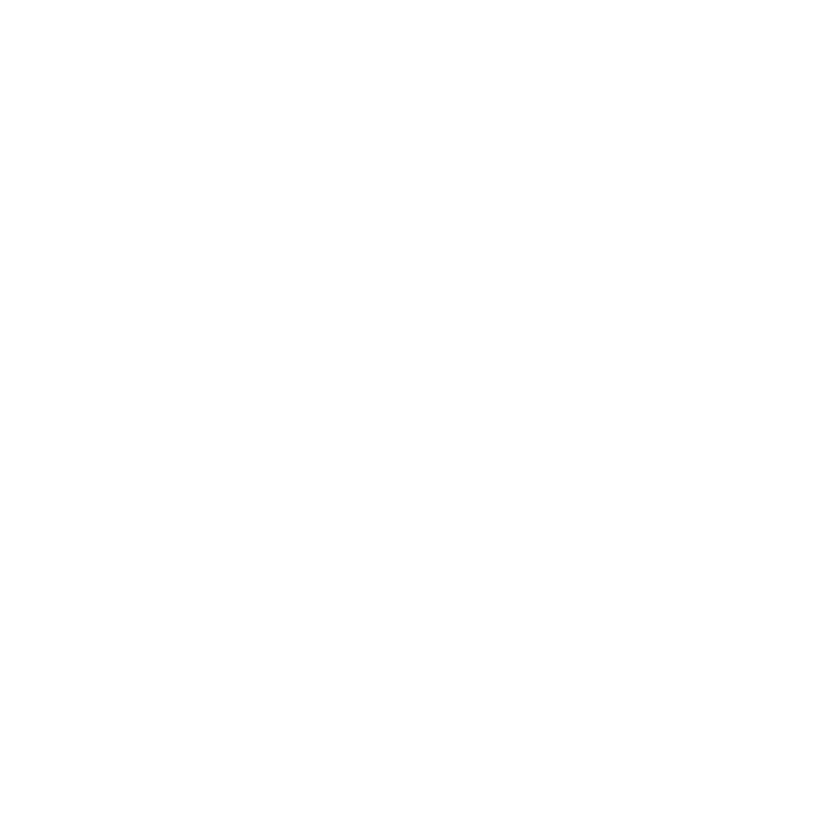

In [23]:
ggplot(data, aes(y=value, x=legend)) + 
    geom_bar(stat="identity", aes=(fill=value))

In [24]:
Year      <- c(rep(c("2006-07", "2007-08", "2008-09", "2009-10"), each = 4))
Category  <- c(rep(c("A", "B", "C", "D"), times = 4))
Frequency <- c(168, 259, 226, 340, 216, 431, 319, 368, 423, 645, 234, 685, 166, 467, 274, 251)
Data      <- data.frame(Year, Category, Frequency)
Data

Year,Category,Frequency
<chr>,<chr>,<dbl>
2006-07,A,168
2006-07,B,259
2006-07,C,226
2006-07,D,340
2007-08,A,216
2007-08,B,431
2007-08,C,319
2007-08,D,368
2008-09,A,423


In [34]:
value <- c(num_total, num_common, num_private, num_unique_vars-num_total, num_unique_vars-num_common, num_unique_vars-num_private)
fill_to_high <- c("Total", "Common", "Private", "toHigh", "toHigh", "toHigh")
legend <- c("Total", "Common", "Private", "Total", "Common", "Private")
bp <- data.frame(value,legend,fill_to_high)
bp$legend = factor(bp$legend, levels = c("Total","Common","Private"))
bp

value,legend,fill_to_high
<int>,<fct>,<chr>
78,Total,Total
52,Common,Common
26,Private,Private
49,Total,toHigh
75,Common,toHigh
101,Private,toHigh


ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (12): fill and x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. rep

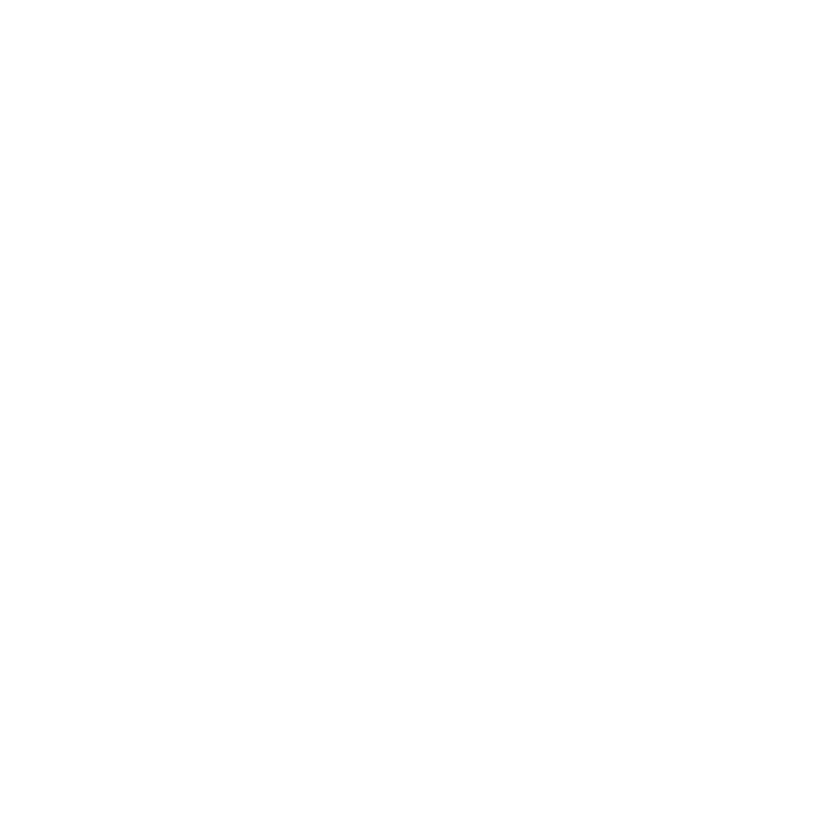

In [29]:
ggplot(data, aes(y=value, x=legend)) + 
    geom_bar(stat="identity", aes(fill=fill_to_high))

In [31]:
DF <- read.table(text="Rank F1     F2     F3
1    500    250    50
2    400    100    30
3    300    155    100
4    200    90     10", header=TRUE)

library(reshape2)
DF1 <- melt(DF, id.var="Rank")

DF1

Rank,variable,value
<int>,<fct>,<int>
1,F1,500
2,F1,400
3,F1,300
4,F1,200
1,F2,250
2,F2,100
3,F2,155
4,F2,90
1,F3,50


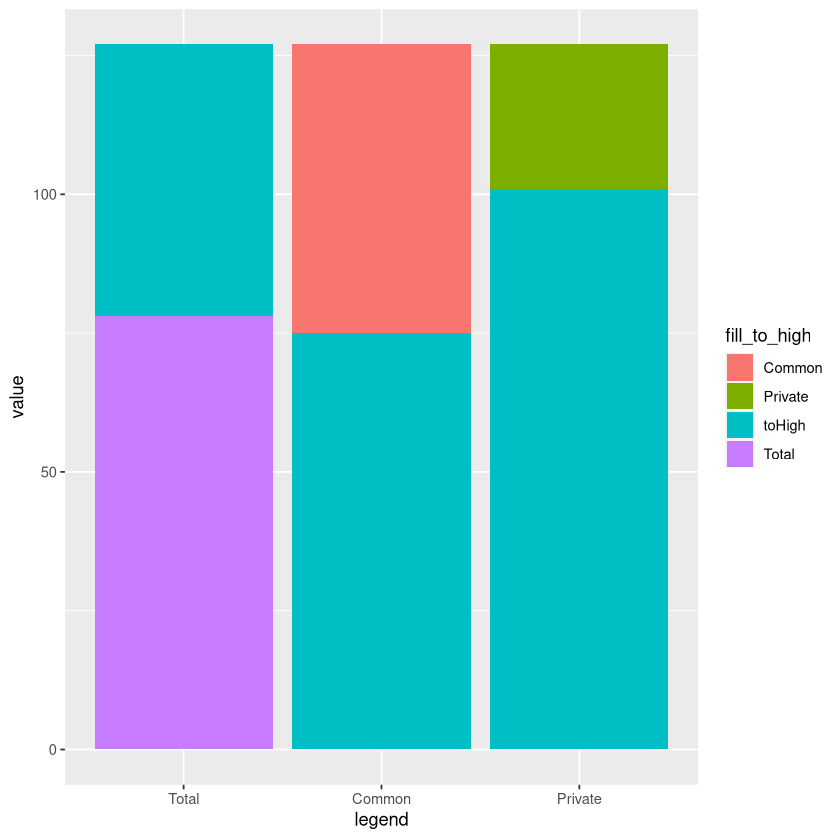

In [35]:
ggplot(bp, aes(x = legend, y = value, fill=fill_to_high)) + 
  geom_bar(stat = "identity")

In [36]:
bp

value,legend,fill_to_high
<int>,<fct>,<chr>
78,Total,Total
52,Common,Common
26,Private,Private
49,Total,toHigh
75,Common,toHigh
101,Private,toHigh


In [37]:
value <- c(num_total, num_common, num_private, num_unique_vars-num_total, num_unique_vars-num_common, num_unique_vars-num_private)
fill_to_high <- c("Value", "Value", "Value", "toHigh", "toHigh", "toHigh")
legend <- c("Total", "Common", "Private", "Total", "Common", "Private")
bp <- data.frame(value,legend,fill_to_high)
bp$legend = factor(bp$legend, levels = c("Total","Common","Private"))
bp

value,legend,fill_to_high
<int>,<fct>,<chr>
78,Total,Value
52,Common,Value
26,Private,Value
49,Total,toHigh
75,Common,toHigh
101,Private,toHigh


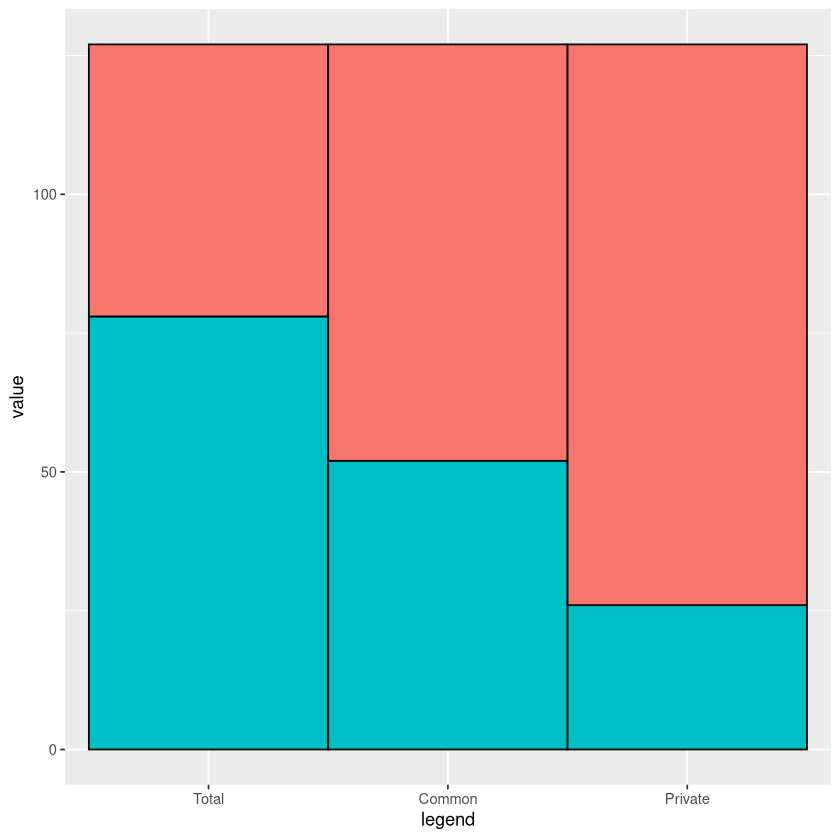

In [44]:
ggplot(bp, aes(x = legend, y = value, fill=factor(fill_to_high, levels=c("toHigh","Value")))) + 
  geom_bar(stat = "identity", show.legend = FALSE, width=1, color='black')

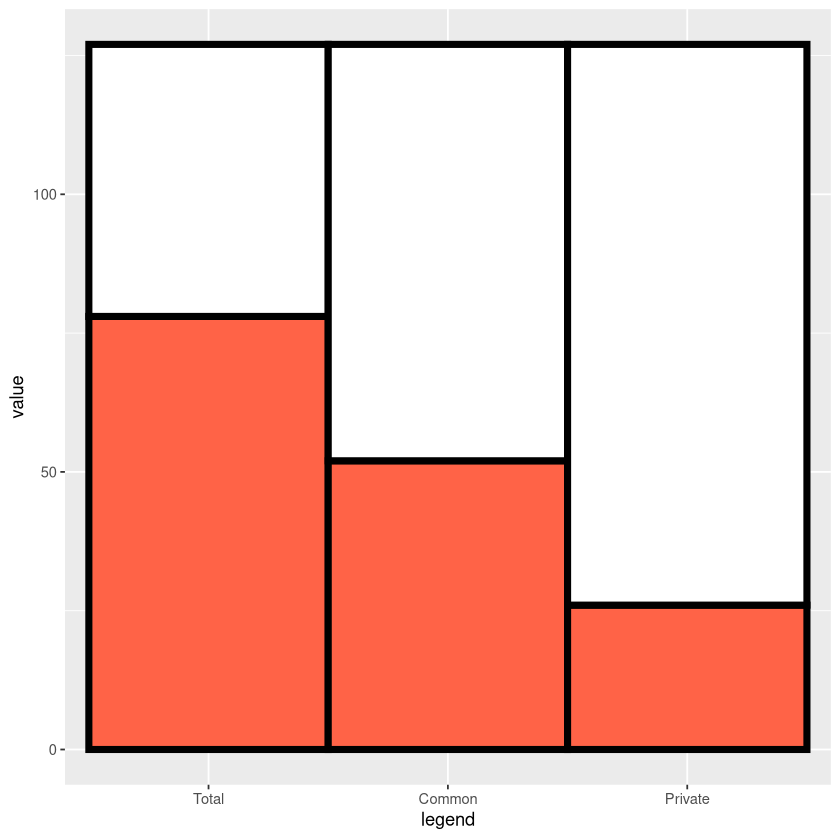

In [64]:
ggplot(bp, aes(x = legend, y = value, fill=factor(fill_to_high, levels=c("toHigh","Value")))) + 
    geom_bar(stat = "identity", show.legend = FALSE, width=1, color='black', size=2) +
    scale_fill_manual(values = c("white","tomato"))

In [54]:
num_unique_vars

[1] 127

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

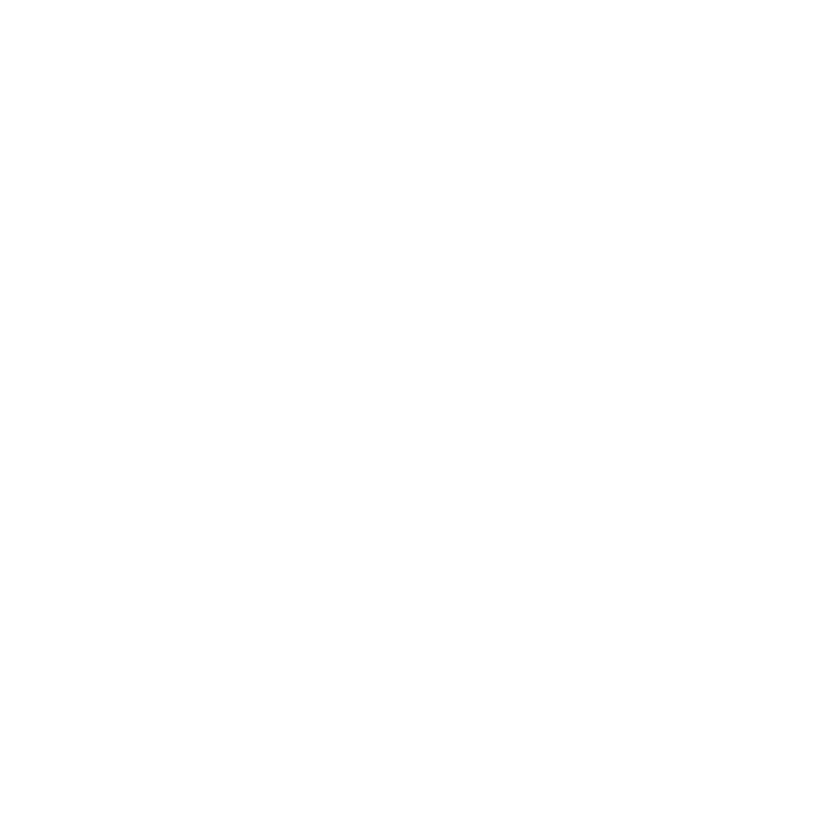

In [56]:
ggplot(bp, aes(x = legend, y = value, fill=factor(fill_to_high, levels=c("toHigh","Value")))) + 
    geom_bar(stat = "identity", show.legend = FALSE, width=1, color='black', aes(size=0.1)) +
    #scale_fill_manual(values = c("white","tomato")) +
    scale_fill_gradient2(high=num_unique_vars, limits=c(-num_unique_vars,num_unique_vars))

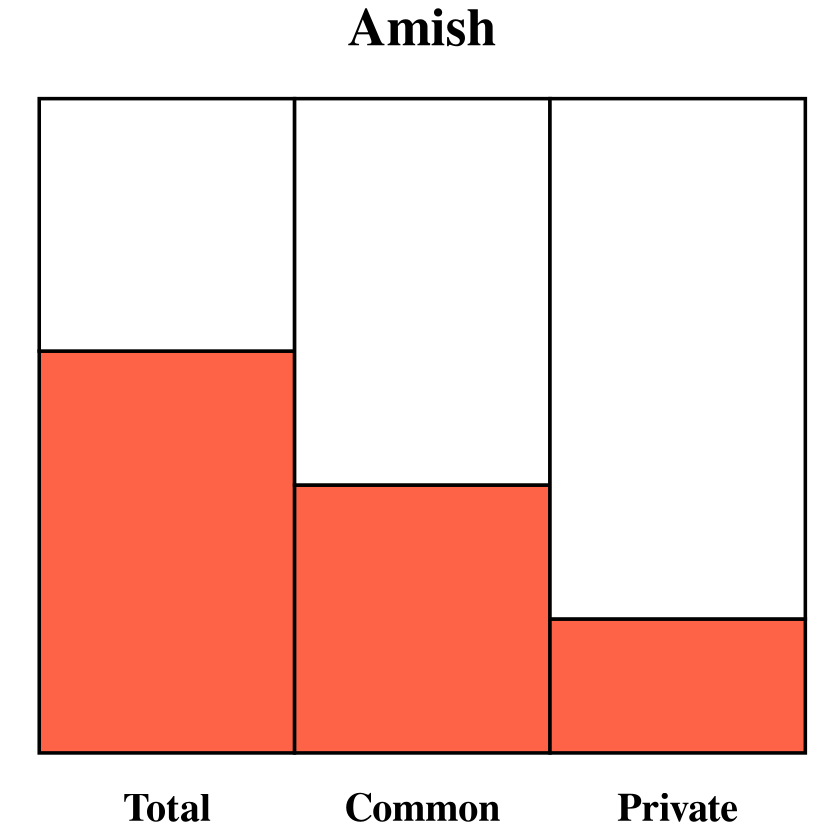

In [123]:
ggplot(bp, aes(x = legend, y = value, fill=factor(fill_to_high, levels=c("toHigh","Value")))) + 
    geom_bar(stat = "identity", show.legend = FALSE, width=1, color='black', size=1) +
    scale_fill_manual(values = c("white","tomato")) +
    labs(x="", y="") + 
    ggtitle("Amish") +
    theme(plot.title = element_text(hjust = 0.5, size=32),
          text = element_text(size=30, face="bold", family="serif"),
          axis.line=element_blank(),
          axis.text.x=element_text(color="black"),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          legend.position="none",
          panel.background=element_blank(),
          panel.border=element_blank(),
          panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          plot.background=element_blank())


In [126]:
barplot_population_variants <- function(num_total, num_common, num_private, pop_name, pop_color, num_all_among_pops){
    
    if(num_all_among_pops == 0){
        num_all_among_pops = num_total
    }
    
    
    value <- c(num_total, num_common, num_private, num_all_among_pops-num_total, 
               num_all_among_pops-num_common, num_all_among_pops-num_private)
    fill_to_high <- c("Value", "Value", "Value", "toHigh", "toHigh", "toHigh")
    legend <- c("Total", "Common", "Private", "Total", "Common", "Private")
    barplot_df <- data.frame(value,legend,fill_to_high)
    barplot_df$legend = factor(bp$legend, levels = c("Total","Common","Private"))
    
    
    return(ggplot(bp, aes(x = legend, y = value, fill=factor(fill_to_high, levels=c("toHigh","Value")))) + 
                geom_bar(stat = "identity", show.legend = FALSE, width=1, color='black', size=1.8) +
                scale_fill_manual(values = c("white",pop_color)) +
                labs(x="", y="") + 
                ggtitle(pop_name) +
                theme(plot.title = element_text(hjust = 0.5, size=28),
                      text = element_text(size=25, face="bold", family="AvantGarde"),
                      axis.line=element_blank(),
                      axis.text.x=element_text(color="black"),
                      axis.text.y=element_blank(),
                      axis.ticks=element_blank(),
                      axis.title.x=element_blank(),
                      axis.title.y=element_blank(),
                      legend.position="none",
                      panel.background=element_blank(),
                      panel.border=element_blank(),
                      panel.grid.major=element_blank(),
                      panel.grid.minor=element_blank(),
                      plot.background=element_blank()))
}


plot_all <- function(pops_variants, pop_colors){
    
    num_all_among_pops <- get_number_of_vars(pops_vars)
    
    i <- 1
    for(pop in pops_variants){
        current_variants <- pop
        current_pop_name <- names(pops_variants)[i]
        all_other_variants <- unlist(unname(pops_variants[c(1:length(pops_variants))[-i]]))
        
        num_total <- length(current_variants)
        num_common <- length(intersect(current_variants, all_other_variants))
        num_private <- num_total-num_common 
        
        pop_plot <- barplot_population_variants(num_total, num_common, num_private, current_pop_name, 
                                                pop_colors[current_pop_name][[1]], num_all_among_pops)
        print(pop_plot)
        cat("\n\n\n\n")
        i <- i+1
    }
    
}

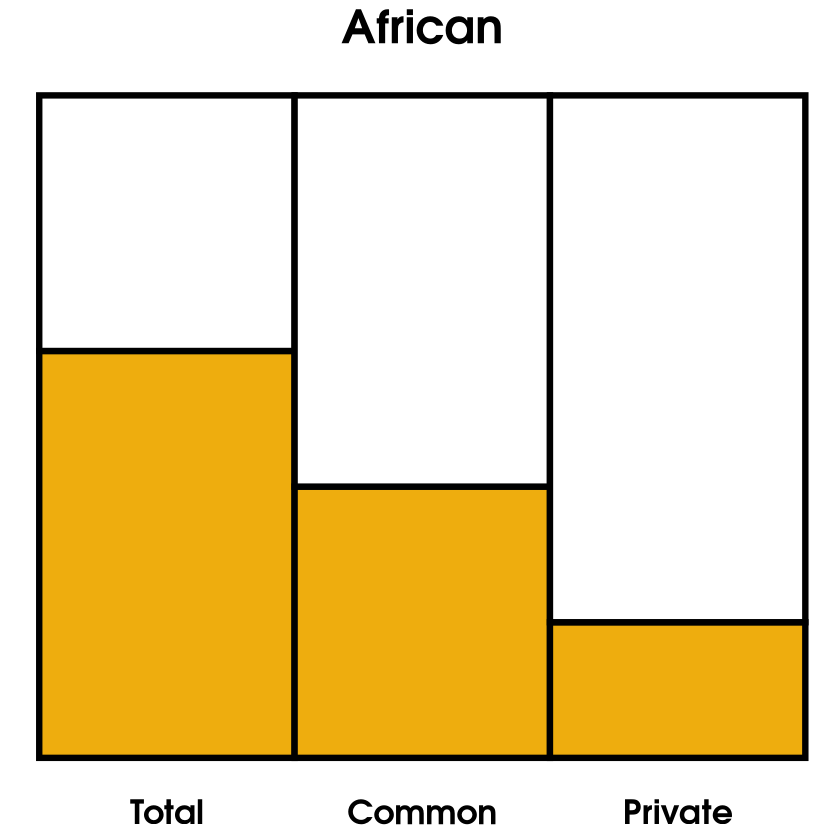

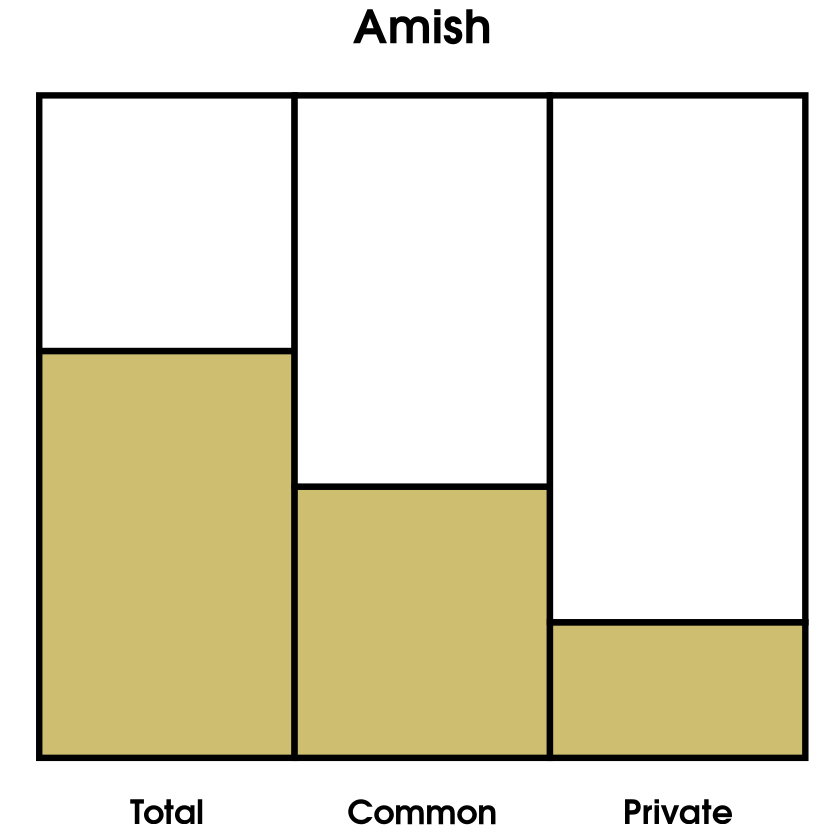

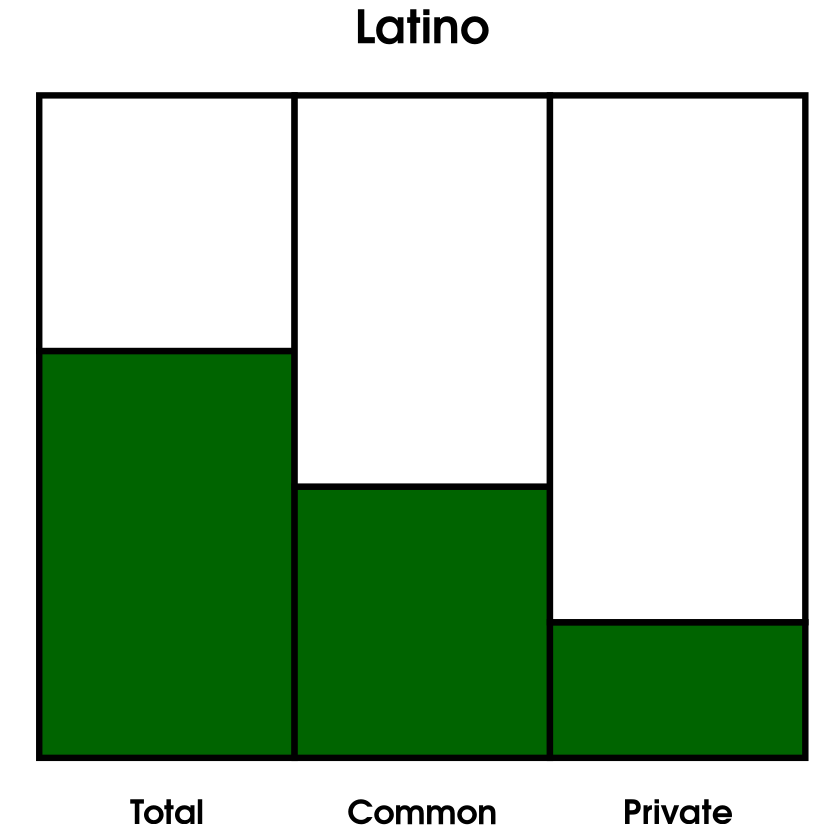

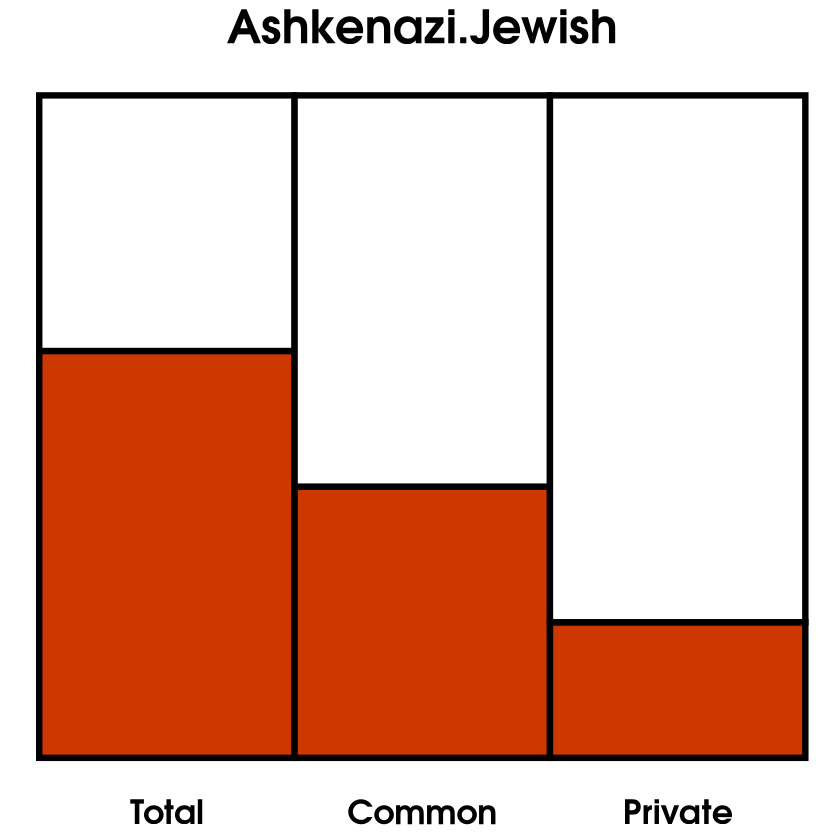

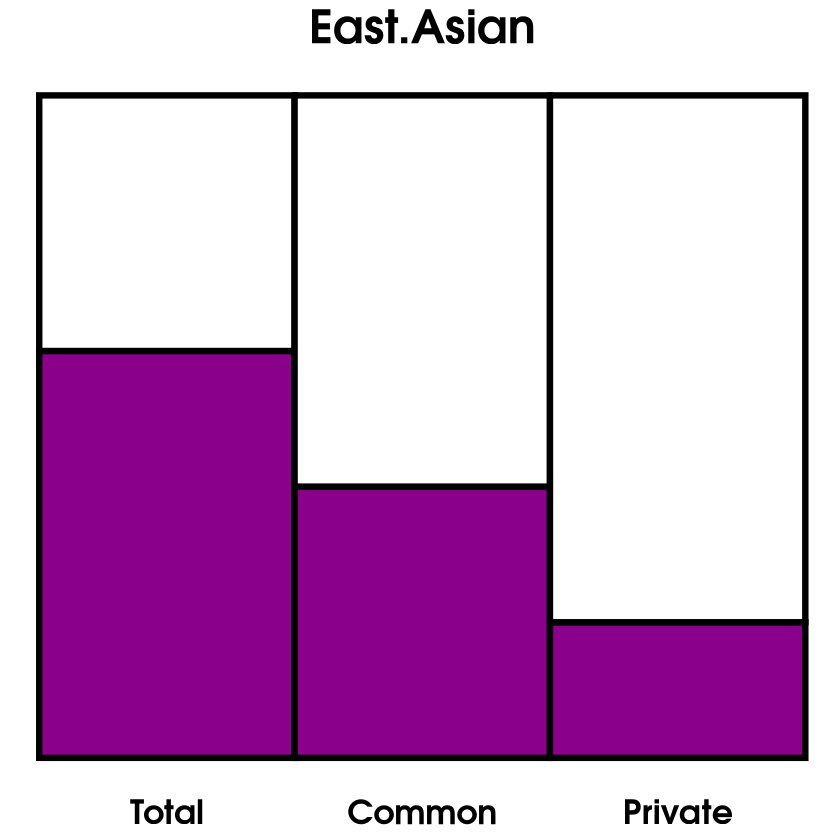

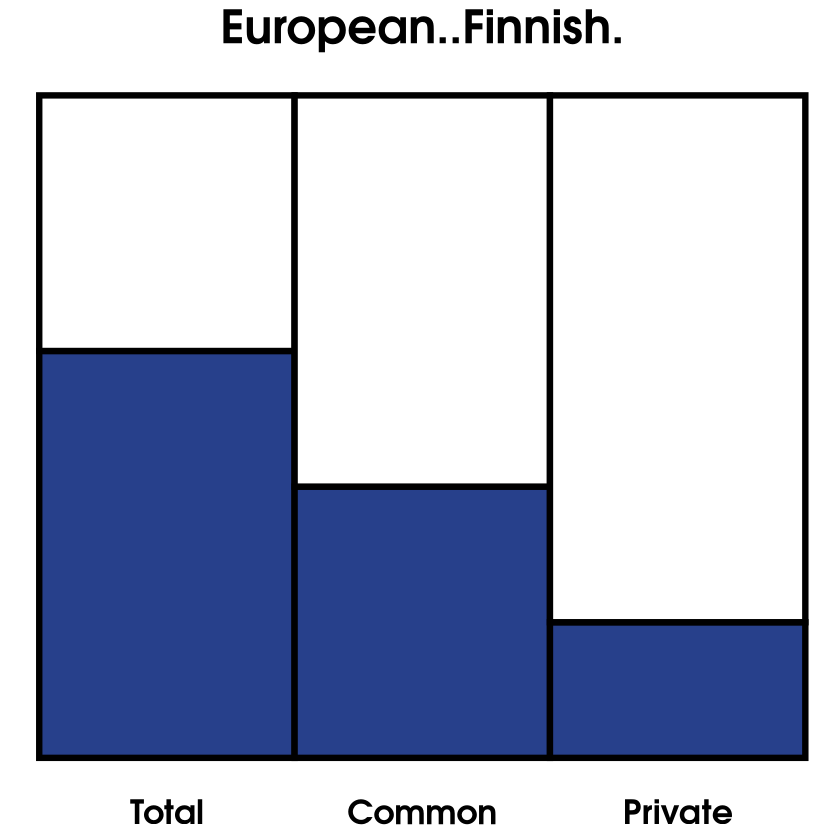

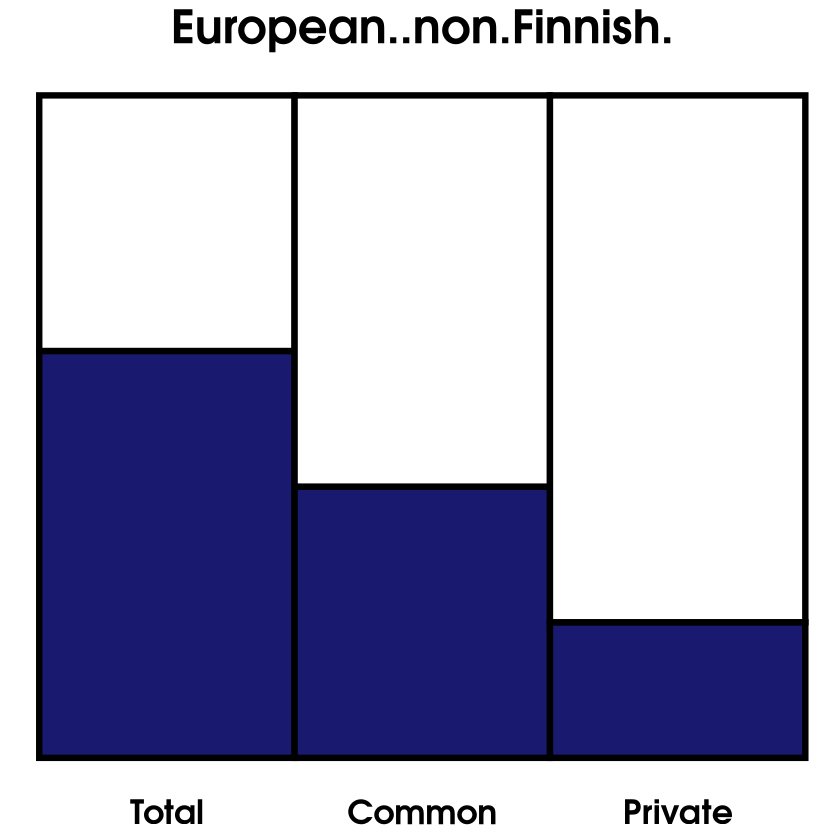

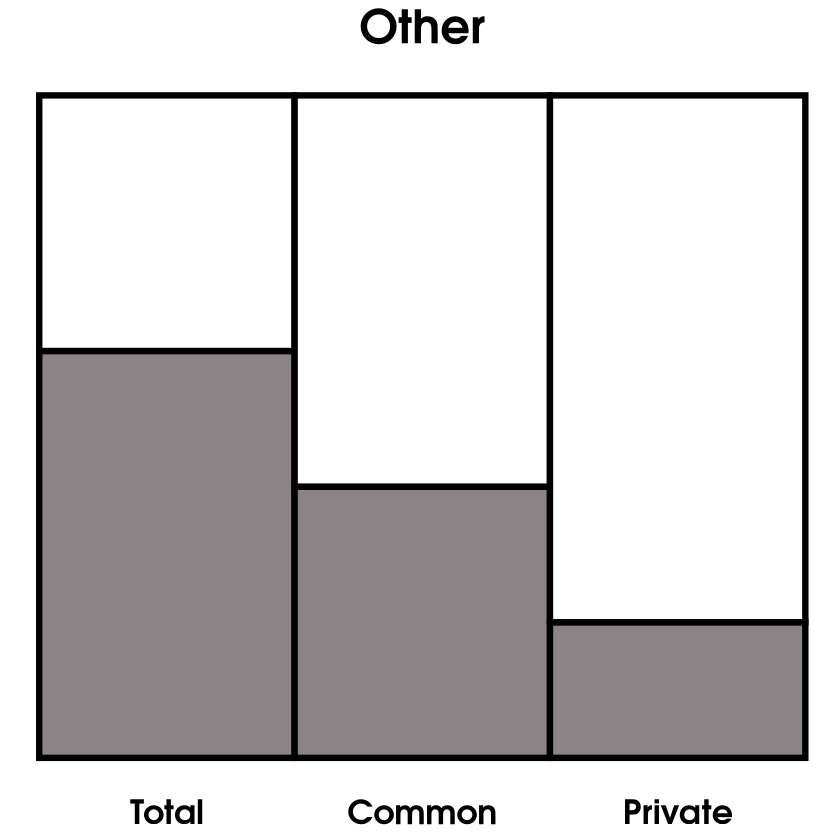

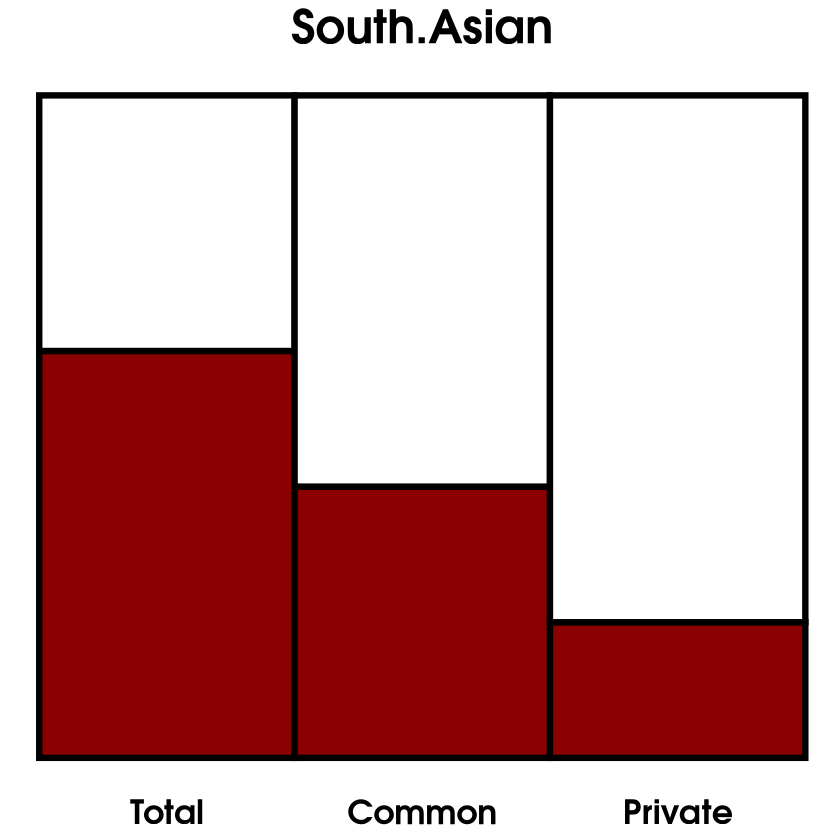

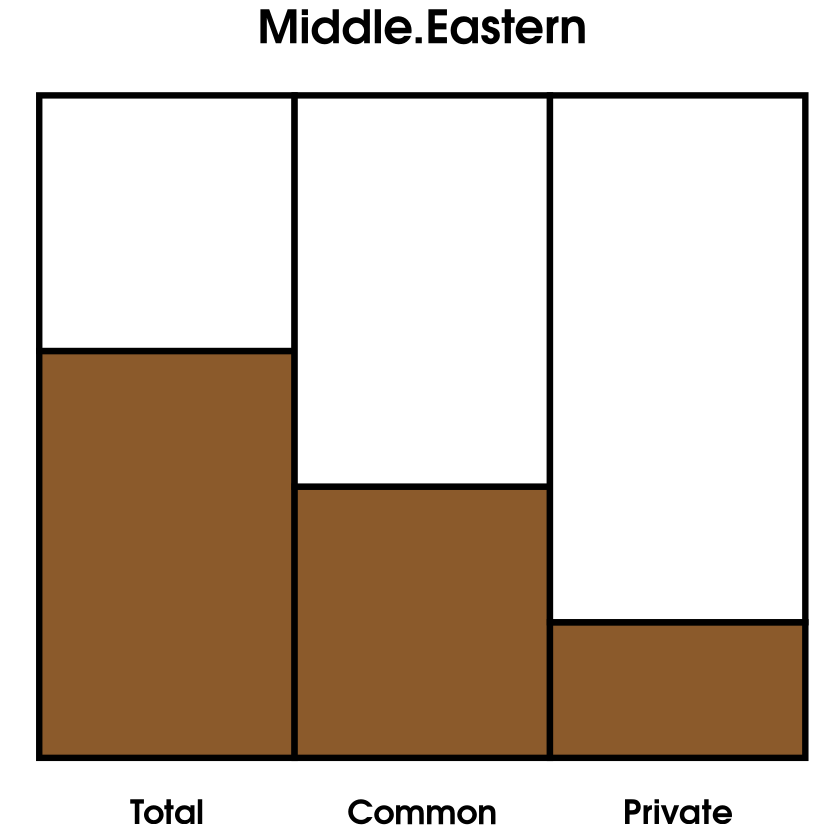

In [127]:
plot_all(pops_vars, pop_colors)

In [149]:
get_all_plots <- function(pops_variants, pop_colors){
    
    num_all_among_pops <- get_number_of_vars(pops_vars)
    plot_list <- list()
    
    i <- 1
    for(pop in pops_variants){
        current_variants <- pop
        current_pop_name <- names(pops_variants)[i]
        all_other_variants <- unlist(unname(pops_variants[c(1:length(pops_variants))[-i]]))
        
        num_total <- length(current_variants)
        num_common <- length(intersect(current_variants, all_other_variants))
        num_private <- num_total-num_common 
        
        pop_plot <- barplot_population_variants(num_total, num_common, num_private, current_pop_name, 
                                                pop_colors[current_pop_name][[1]], num_all_among_pops)
        
        plot_list[[i]] <- pop_plot
        i <- i+1
    }
    
    return (plot_list)
}

In [136]:
plot_list <- get_all_plots(pops_vars, pop_colors)

In [131]:
library(gridExtra)

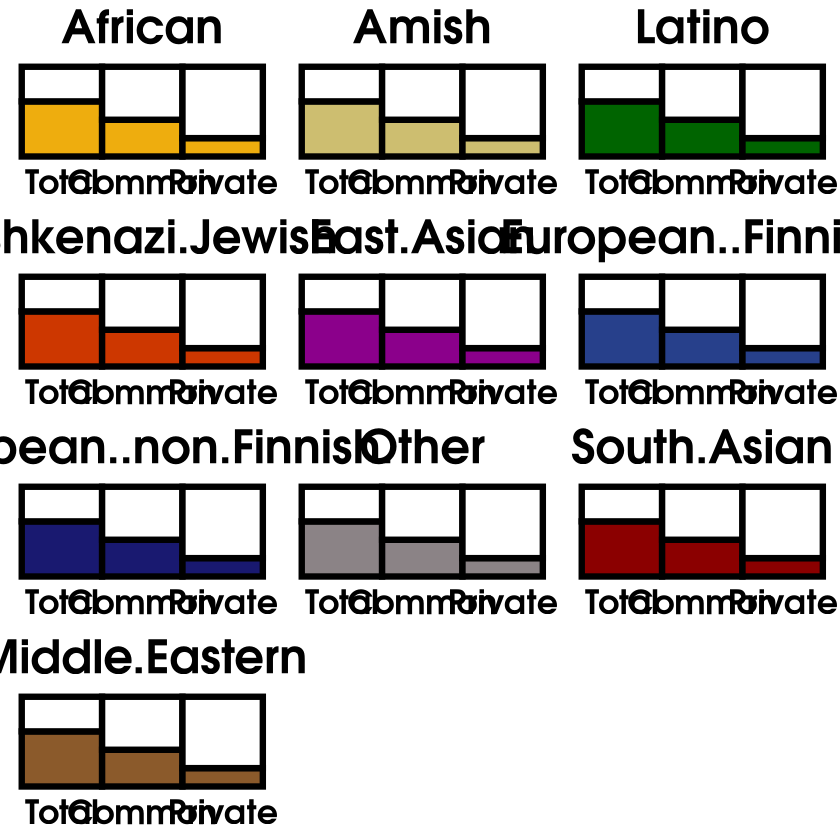

In [138]:
gridExtra::grid.arrange(grobs = plot_list)

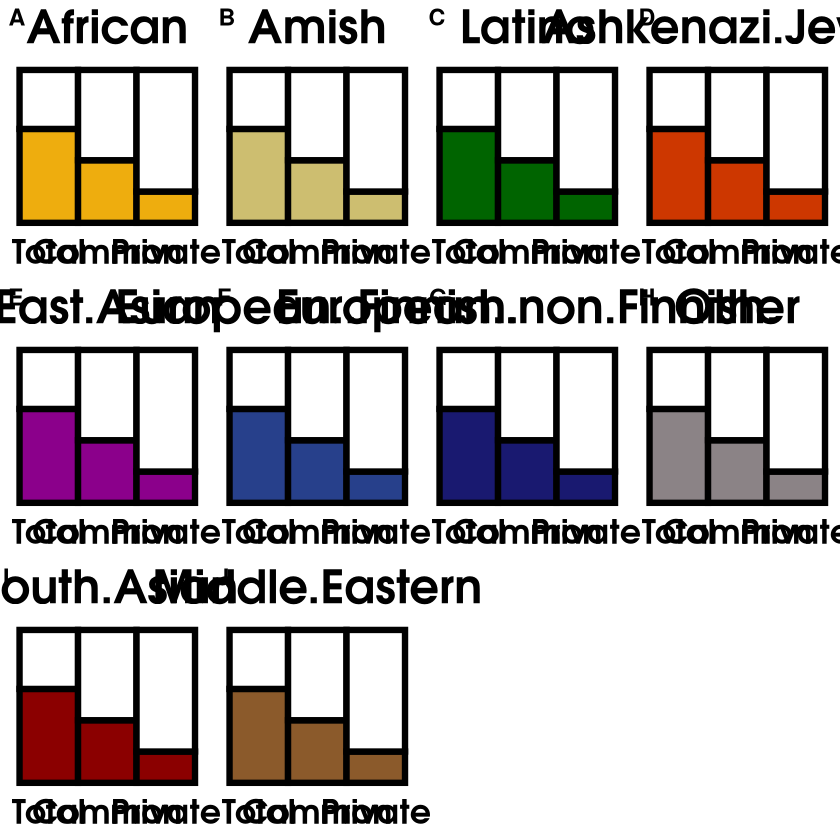

In [142]:
library(cowplot)
cowplot::plot_grid(plotlist = plot_list, align = "hv")

In [208]:
barplot_population_variants <- function(num_total, num_common, num_private, pop_name, pop_color, num_all_among_pops){
    
    if(num_all_among_pops == 0){
        num_all_among_pops = num_total
    }
    
    if (pop_name == "European..Finnish."){
        pop_name <- "Finnish"
    } else if (pop_name == "European..non.Finnish."){
        pop_name <- "European"
    }
    pop_name <- gsub("\\."," ",pop_name)
    
    
    value <- c(num_total, num_common, num_private, num_all_among_pops-num_total, 
               num_all_among_pops-num_common, num_all_among_pops-num_private)
    fill_to_high <- c("Value", "Value", "Value", "toHigh", "toHigh", "toHigh")
    legend <- c("1", "2", "3", "1", "2", "3")
    barplot_df <- data.frame(value,legend,fill_to_high)
    
    return(ggplot(barplot_df, aes(x = legend, y = value, fill=factor(fill_to_high, levels=c("toHigh","Value")))) + 
                geom_bar(stat = "identity", show.legend = FALSE, width=1, color='black', size=1.8) +
                scale_fill_manual(values = c("white",pop_color)) +
                labs(x="", y="") + 
                ggtitle(pop_name) +
                theme(plot.title = element_text(hjust = 0.5, size=15),
                      text = element_text(size=20, face="bold", family="AvantGarde"),
                      axis.line=element_blank(),
                      axis.text.x=element_text(color="black", margin=margin(t=-2, b=15)),
                      axis.text.y=element_blank(),
                      axis.ticks=element_blank(),
                      axis.title.x=element_blank(),
                      axis.title.y=element_blank(),
                      legend.position="none",
                      panel.background=element_blank(),
                      panel.border=element_blank(),
                      panel.grid.major=element_blank(),
                      panel.grid.minor=element_blank(),
                      plot.background=element_blank()))
}

get_all_plots <- function(pops_variants, pop_colors){
    
    num_all_among_pops <- get_number_of_vars(pops_vars)
    plot_list <- list()
    
    i <- 1
    for(pop in pops_variants){
        current_variants <- pop
        current_pop_name <- names(pops_variants)[i]
        all_other_variants <- unlist(unname(pops_variants[c(1:length(pops_variants))[-i]]))
        
        num_total <- length(current_variants)
        num_common <- length(intersect(current_variants, all_other_variants))
        num_private <- num_total-num_common 
        
        pop_plot <- barplot_population_variants(num_total, num_common, num_private, current_pop_name, 
                                                pop_colors[current_pop_name][[1]], num_all_among_pops)
        
        plot_list[[i]] <- pop_plot
        i <- i+1
    }
    
    return (plot_list)
}

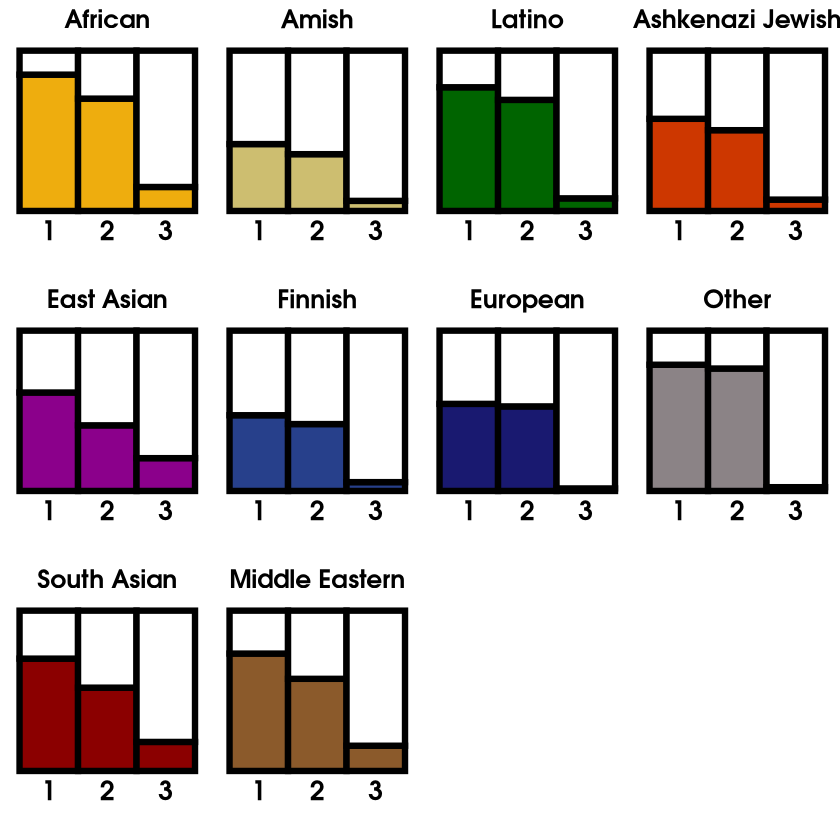

In [209]:
plot_list <- get_all_plots(pops_vars, pop_colors)
cowplot::plot_grid(plotlist = plot_list, align = "hv")

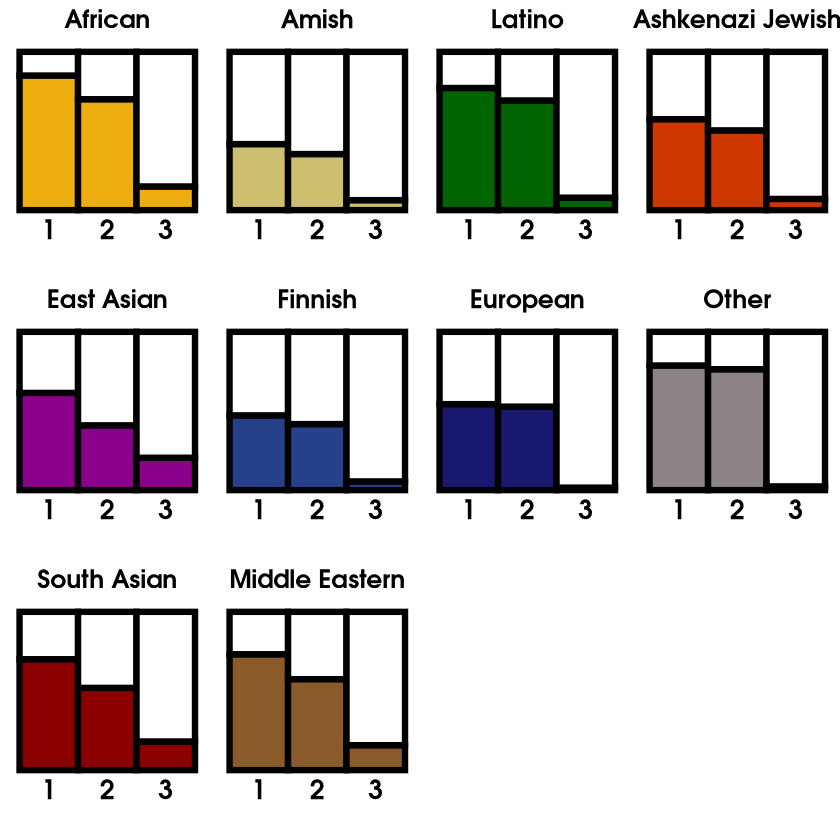

In [213]:
gridExtra::grid.arrange(grobs = plot_list, ncol=4)

In [2]:
barplot_population_variants <- function(num_total, num_common, num_private, pop_name, pop_color, num_all_among_pops){
    
    if(num_all_among_pops == 0){
        num_all_among_pops = num_total
    }
    
    if (pop_name == "European..Finnish."){
        pop_name <- "Finnish"
    } else if (pop_name == "European..non.Finnish."){
        pop_name <- "European"
    }
    pop_name <- gsub("\\."," ",pop_name)
    
    
    value <- c(num_total, num_common, num_private, num_all_among_pops-num_total, 
               num_all_among_pops-num_common, num_all_among_pops-num_private)
    fill_to_high <- c("Value", "Value", "Value", "toHigh", "toHigh", "toHigh")
    legend <- c("Total", "Common", "Private", "Total", "Common", "Private")
    barplot_df <- data.frame(value,legend,fill_to_high)
    barplot_df$legend = factor(barplot_df$legend, levels = c("Total","Common","Private"))
    
    return(ggplot(barplot_df, aes(x = legend, y = value, fill=factor(fill_to_high, levels=c("toHigh","Value")))) + 
                geom_bar(stat = "identity", show.legend = FALSE, width=1, color='black', size=1.8) +
                scale_fill_manual(values = c("white",pop_color)) +
                labs(x="", y="") + 
                ggtitle(pop_name) +
                theme(plot.title = element_text(hjust = 0.5, size=15),
                      text = element_text(size=10, face="bold", family="AvantGarde"),
                      axis.line=element_blank(),
                      axis.text.x=element_text(color="black", margin=margin(t=-2, b=15)),
                      axis.text.y=element_blank(),
                      axis.ticks=element_blank(),
                      axis.title.x=element_blank(),
                      axis.title.y=element_blank(),
                      legend.position="none",
                      panel.background=element_blank(),
                      panel.border=element_blank(),
                      panel.grid.major=element_blank(),
                      panel.grid.minor=element_blank(),
                      plot.background=element_blank()))
}

get_all_plots <- function(pops_variants, pop_colors){
    
    num_all_among_pops <- get_number_of_vars(pops_vars)
    plot_list <- list()
    
    i <- 1
    for(pop in pops_variants){
        current_variants <- pop
        current_pop_name <- names(pops_variants)[i]
        all_other_variants <- unlist(unname(pops_variants[c(1:length(pops_variants))[-i]]))
        
        num_total <- length(current_variants)
        num_common <- length(intersect(current_variants, all_other_variants))
        num_private <- num_total-num_common 
        
        pop_plot <- barplot_population_variants(num_total, num_common, num_private, current_pop_name, 
                                                pop_colors[current_pop_name][[1]], num_all_among_pops)
        
        plot_list[[i]] <- pop_plot
        i <- i+1
    }
    
    return (plot_list)
}

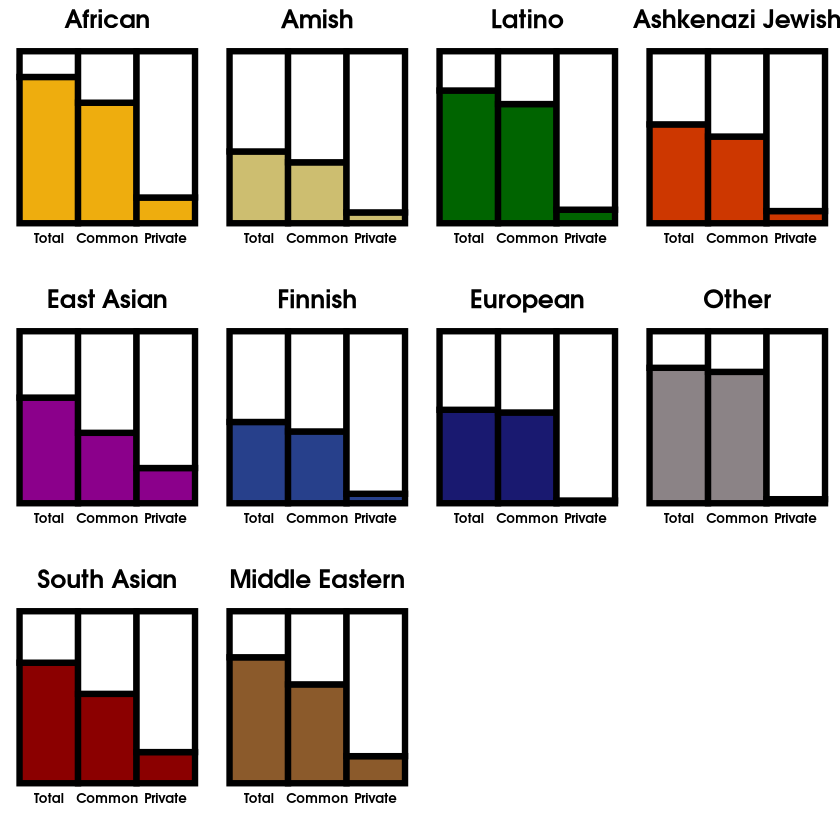

In [215]:
plot_list <- get_all_plots(pops_vars, pop_colors)
cowplot::plot_grid(plotlist = plot_list, align = "hv")

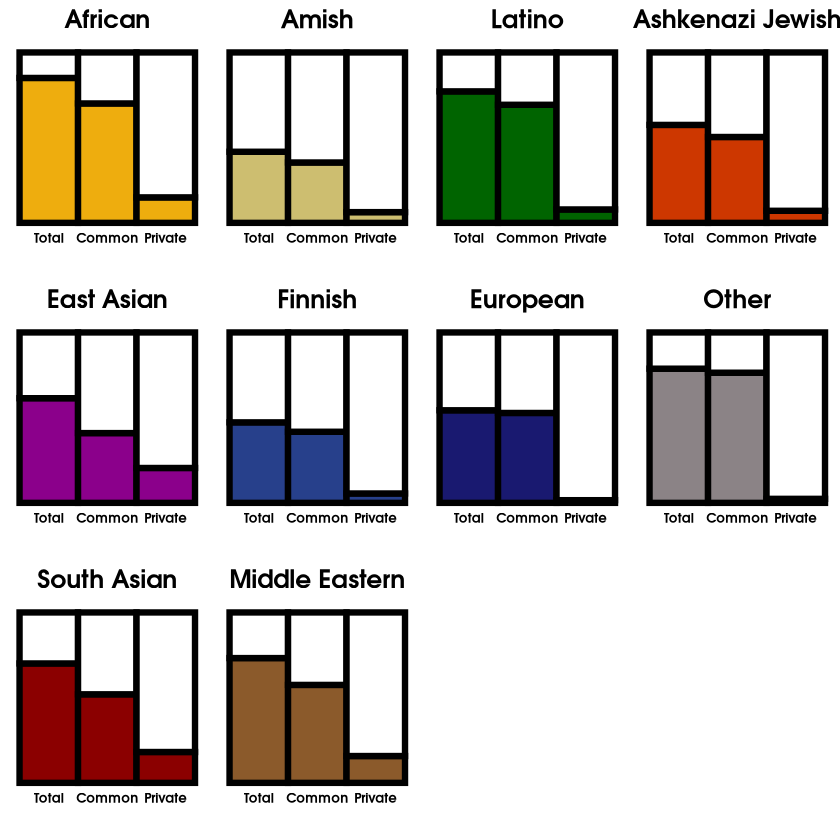

In [216]:
gridExtra::grid.arrange(grobs = plot_list, ncol=4)

In [186]:
get_all_plots <- function(pops_variants, pop_colors){
    
    num_all_among_pops <- get_number_of_vars(pops_vars)
    plot_list <- list()
    
    i <- 1
    p_i <- 1
    for(pop in pops_variants){
        current_variants <- pop
        current_pop_name <- names(pops_variants)[i]
        all_other_variants <- unlist(unname(pops_variants[c(1:length(pops_variants))[-i]]))
        
        num_total <- length(current_variants)
        num_common <- length(intersect(current_variants, all_other_variants))
        num_private <- num_total-num_common 
        
        pop_plot <- barplot_population_variants(num_total, num_common, num_private, current_pop_name, 
                                                pop_colors[current_pop_name][[1]], num_all_among_pops)
        
        plot_list[[p_i]] <- pop_plot
        p_i <- p_i+1
        plot_list[[p_i]] <- NULL
        p_i <- p_i+1
        
        i <- i+1
    }
    
    return (plot_list)
}

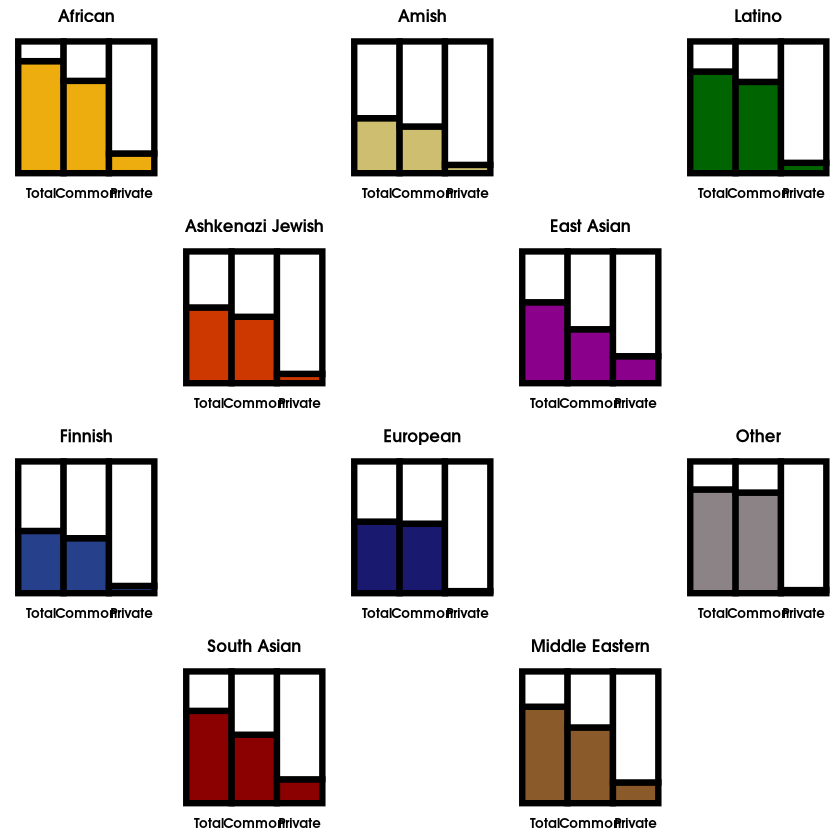

In [187]:
plot_list <- get_all_plots(pops_vars, pop_colors)
cowplot::plot_grid(plotlist = plot_list, align = "hv")

# Covid variants results

In [27]:
library(ggplot2)
library(gridExtra)

pop_colors = c("darkgoldenrod2", "lightgoldenrod3", "darkgreen", "orangered3", "magenta4", 
               "royalblue4", "midnightblue", "lavenderblush4", "darkred", "tan4")
pop_names = c('African', 'Amish', 'Latino', 'Ashkenazi.Jewish',
              'East.Asian', 'European..Finnish.', 'European..non.Finnish.',
              'Other', 'South.Asian', 'Middle.Eastern')

names(pop_colors) = pop_names

df <- read.csv("test_data/ace2_tmprss2.csv")
df <- get_reoordered_df(df)
pop_dfs <- get_pop_dfs(df)
pops_vars <- get_pop_var_lists(pop_dfs)
num_unique_vars <- get_number_of_vars(pops_vars)

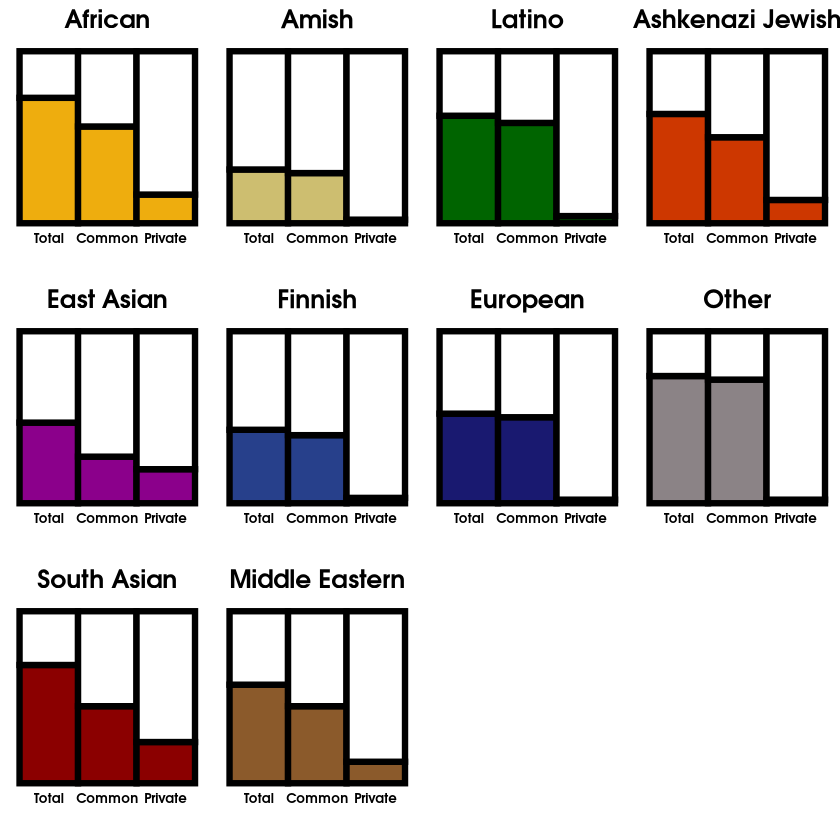

In [28]:
plot_list <- get_all_plots(pops_vars, pop_colors)
cowplot::plot_grid(plotlist = plot_list, align = "hv")